# Step 1: Data Acquisition & Basic Exploration
In this step, we will:
- Download and load the dataset
- Inspect the file structure
- Confirm data shape and basic info

**Validation Criteria:** 
- Dataset successfully loaded into a DataFrame.
- Column names and data types make sense.


In [265]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Download and load dataset
path = kagglehub.dataset_download("taeefnajib/used-car-price-prediction-dataset")
print("Path to dataset files:", path)

files = os.listdir(path)
print("Files in directory:", files)

df = pd.read_csv(os.path.join(path, "used_cars.csv"))

print("Initial Dataset Head:")
display(df.head())

print("Dataset Shape:", df.shape)
print("Dataset Info:")
df.info()


Path to dataset files: /Users/rayva/.cache/kagglehub/datasets/taeefnajib/used-car-price-prediction-dataset/versions/1
Files in directory: ['used_cars.csv']
Initial Dataset Head:


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


Dataset Shape: (4009, 12)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


# Step 2: Initial Examination of Data
We will:
- Check for missing values
- Examine data types and unique values in categorical columns
- Review initial summary statistics

**Validation Criteria:**
- Identified which columns have missing values.
- Confirmed basic data structure and variable types.



Missing Values:


clean_title     596
fuel_type       170
accident        113
brand             0
model             0
model_year        0
milage            0
engine            0
transmission      0
ext_col           0
int_col           0
price             0
dtype: int64


Unique Values:


milage          2818
model           1898
price           1569
engine          1146
ext_col          319
int_col          156
transmission      62
brand             57
model_year        34
fuel_type          7
accident           2
clean_title        1
dtype: int64


Sample of Unique Values in Text Columns:

brand unique values (first 5):
['Ford' 'Hyundai' 'Lexus' 'INFINITI' 'Audi']

model unique values (first 5):
['Utility Police Interceptor Base' 'Palisade SEL' 'RX 350 RX 350'
 'Q50 Hybrid Sport' 'Q3 45 S line Premium Plus']

milage unique values (first 5):
['51,000 mi.' '34,742 mi.' '22,372 mi.' '88,900 mi.' '9,835 mi.']

fuel_type unique values (first 5):
['E85 Flex Fuel' 'Gasoline' 'Hybrid' nan 'Diesel']

engine unique values (first 5):
['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability'
 '3.8L V6 24V GDI DOHC' '3.5 Liter DOHC'
 '354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid'
 '2.0L I4 16V GDI DOHC Turbo']

transmission unique values (first 5):
['6-Speed A/T' '8-Speed Automatic' 'Automatic' '7-Speed A/T' 'F']

ext_col unique values (first 5):
['Black' 'Moonlight Cloud' 'Blue' 'Glacier White Metallic' 'Silver']

int_col unique values (first 5):
['Black' 'Gray' 'Ebony.' 'Green' 'Pimento / Ebony']

accident unique values (first 5):
['A

,model_year,milage,price
count,4009.000000,4009.000000,4.009000e+03
mean,2015.515590,64717.551010,4.455319e+04
std,6.104816,52296.599459,7.871064e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,23044.000000,1.720000e+04
50%,2017.000000,52775.000000,3.100000e+04
75%,2020.000000,94100.000000,4.999000e+04
max,2024.000000,405000.000000,2.954083e+06


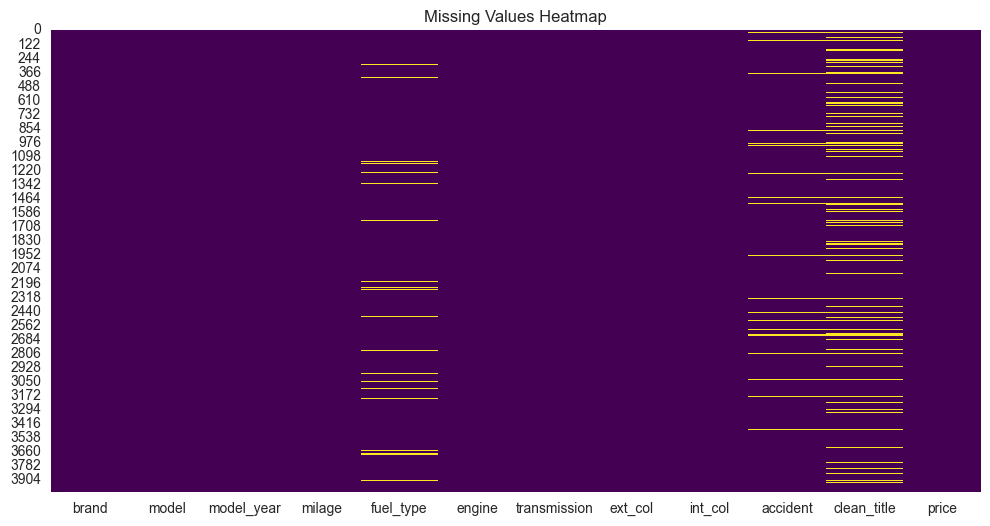

In [267]:
# Missing values
print("\nMissing Values:")
missing_counts = df.isnull().sum().sort_values(ascending=False)
display(missing_counts)

print("\nUnique Values:")
unique_counts = df.nunique().sort_values(ascending=False)
display(unique_counts)

# Unique values in categorical columns
print("\nSample of Unique Values in Text Columns:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"\n{column} unique values (first 5):")
    print(df[column].unique()[:5])
    
if df['price'].dtype == 'object':
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

if 'milage' in df.columns and df['milage'].dtype == 'object':
    df['milage'] = df['milage'].replace('[, mi. ]', '', regex=True).astype(float)


# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Visualize missingness
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [273]:
# Display all unique transmission values and their counts
print("\nUnique Transmission Values:")
print("=" * 40)

# Ensure all rows are displayed
pd.set_option('display.max_rows', None)

# Display the full list of unique transmission values and their counts
transmission_counts = df['transmission'].value_counts()
display(transmission_counts)

# Optionally reset the display setting
pd.reset_option('display.max_rows')



Unique Transmission Values:


transmission
A/T                                                                 1037
8-Speed A/T                                                          406
Transmission w/Dual Shift Mode                                       398
6-Speed A/T                                                          362
6-Speed M/T                                                          248
Automatic                                                            237
7-Speed A/T                                                          209
8-Speed Automatic                                                    176
10-Speed A/T                                                         119
5-Speed A/T                                                           86
9-Speed A/T                                                           74
6-Speed Automatic                                                     73
4-Speed A/T                                                           72
1-Speed A/T                           

In [271]:
from scipy.stats import zscore
# Identify outliers for numerical features using Z-scores
numerical_features = ['price', 'milage', 'model_year']
outliers_dict = {}

for feature in numerical_features:
    z_scores = zscore(df[feature])
    outliers = df[abs(z_scores) > 3]  # Z-score > 3
    outliers_dict[feature] = outliers
    print(f"\nNumber of outliers in {feature}: {len(outliers)}")
    print(outliers[[feature, 'brand', 'model']])  # Display relevant info



Number of outliers in price: 31
          price          brand                            model
76     359991.0    Lamborghini            Huracan Tecnica Coupe
180    417500.0        Porsche                       911 GT2 RS
203    429998.0           Ford                               GT
229   1950995.0        Bugatti          Veyron 16.4 Grand Sport
254    359991.0    Lamborghini            Huracan Tecnica Coupe
304    488880.0    Rolls-Royce  Phantom Drophead Coupe Drophead
364    288900.0    Lamborghini                 Huracan EVO Base
450    314900.0    Rolls-Royce                       Ghost Base
487    449995.0    Rolls-Royce                         Cullinan
624    695000.0    Rolls-Royce                         Cullinan
693   2954083.0       Maserati                Quattroporte Base
979    649999.0    Lamborghini               Aventador SVJ Base
1061   489995.0          Dodge                        Viper GTC
1148   489000.0        Porsche                            911 R
1356   

# Step 3: Univariate Analysis
- Investigate distributions of key numeric variables (e.g., price, mileage).
- Identify outliers and skewness.
- Understand categorical variable distributions (frequency counts).

**Validation Criteria:**
- Major outliers noted.
- Skewness identified for variables (e.g., price, mileage).


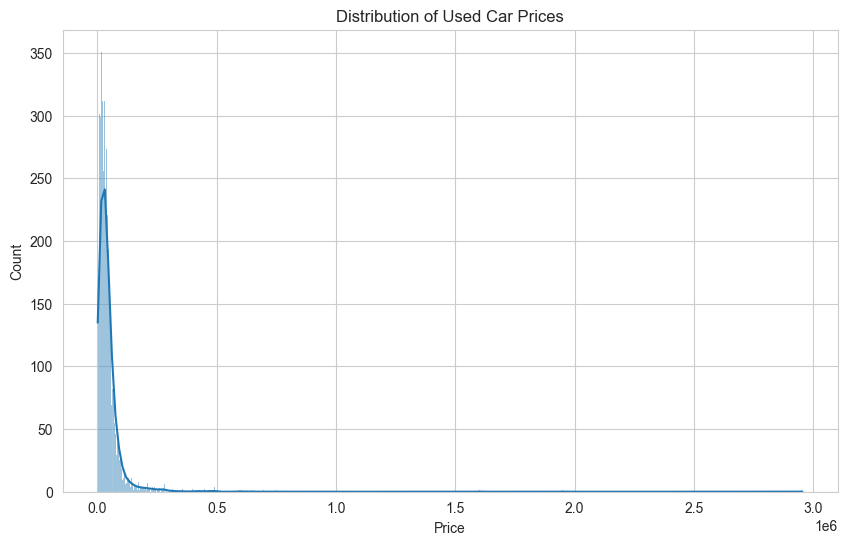

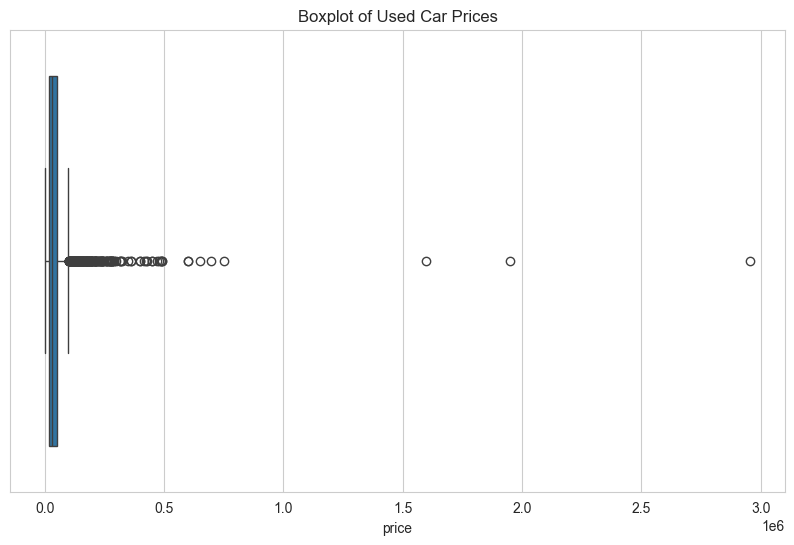

Number of cars with price = 0: 0

Mileage Statistics:


count      4009.000000
mean      64717.551010
std       52296.599459
min         100.000000
25%       23044.000000
50%       52775.000000
75%       94100.000000
max      405000.000000
Name: milage, dtype: float64

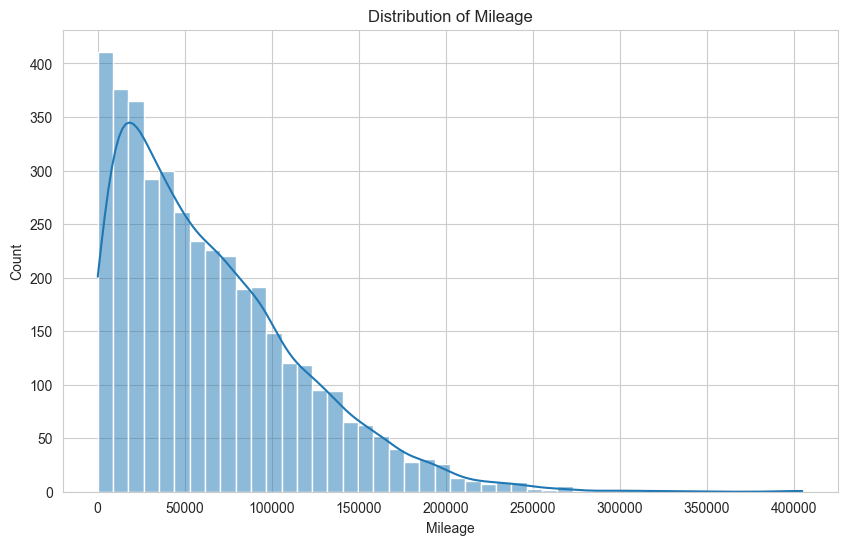

In [210]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Clean price column if needed
if df['price'].dtype == 'object':
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Distribution of price
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Outliers in price
sns.boxplot(x=df['price'])
plt.title('Boxplot of Used Car Prices')
plt.show()

# Check zero or invalid prices
print(f"Number of cars with price = 0: {sum(df['price'] == 0)}")

# Mileage distribution (convert if needed)
if 'milage' in df.columns and df['milage'].dtype == 'object':
    df['milage'] = df['milage'].replace('[, mi. ]', '', regex=True).astype(float)

print("\nMileage Statistics:")
display(df['milage'].describe())

sns.histplot(df['milage'], kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.show()


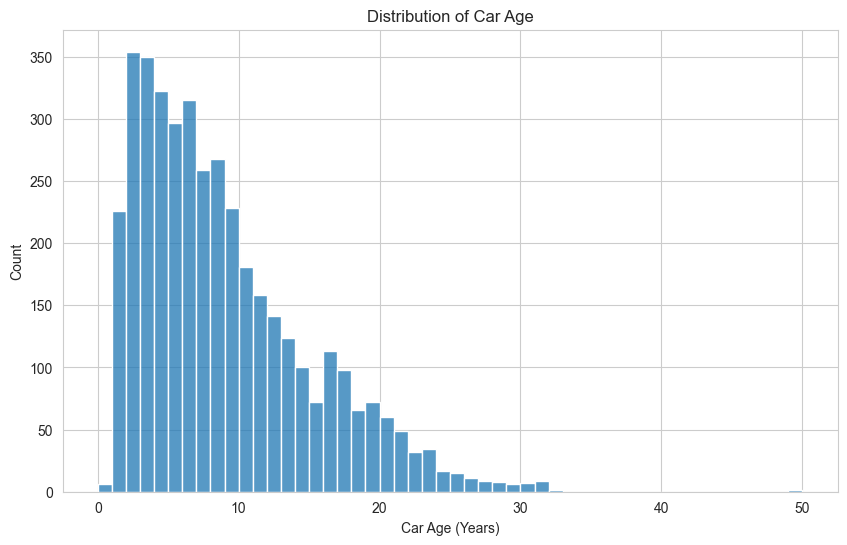

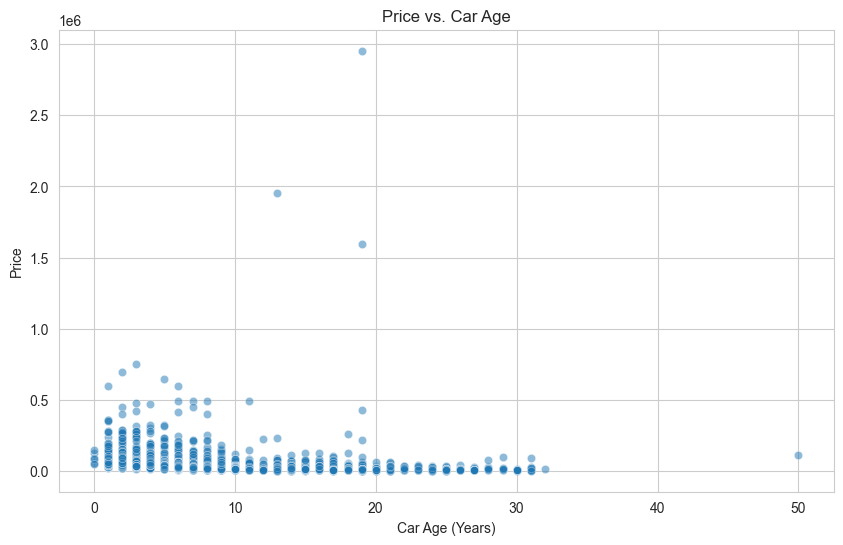

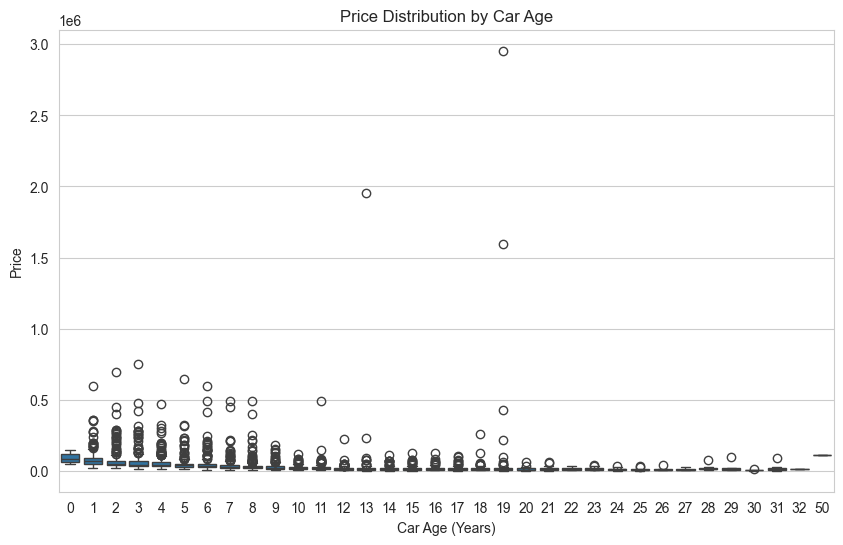

In [211]:
# Ensure 'model_year' is numeric and calculate 'car_age'
if 'model_year' in df.columns:
    df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')
    current_year = 2024
    df['car_age'] = current_year - df['model_year']

# Ensure car_age is integer
df['car_age'] = df['car_age'].fillna(0).astype(int)

# Plot car_age distribution
sns.histplot(df['car_age'], kde=False, bins=range(int(df['car_age'].min()), int(df['car_age'].max()) + 1))
plt.title('Distribution of Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Count')
plt.show()

# Scatter plot of price vs. car_age
sns.scatterplot(x='car_age', y='price', data=df, alpha=0.5)
plt.title('Price vs. Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price')
plt.show()

# Boxplot of price grouped by car_age
sns.boxplot(x='car_age', y='price', data=df)
plt.title('Price Distribution by Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price')
plt.show()


In [212]:
# Count the number of rows where car_age is 0
num_rows_to_remove = df[df['car_age'] == 0].shape[0]
print(f"Number of rows with car_age = 0: {num_rows_to_remove}")

# Preview rows with car_age = 0
rows_to_remove = df[df['car_age'] == 0]
print("Rows with car_age = 0:")
print(rows_to_remove)


Number of rows with car_age = 0: 6
Rows with car_age = 0:
      brand               model  model_year  milage fuel_type  \
443     BMW               M3 CS        2024   456.0  Gasoline   
556   Mazda       CX-90 Premium        2024  3880.0  Gasoline   
1691    BMW               M3 CS        2024   124.0  Gasoline   
2289    BMW        840 i xDrive        2024  1500.0  Gasoline   
3309    GMC  Sierra 2500 Denali        2024  2043.0  Gasoline   
3529  Lexus     NX 350h Premium        2024   300.0    Hybrid   

                                                 engine  \
443   543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
556                                                2.5L   
1691  543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2289  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
3309       401.0HP 6.6L 8 Cylinder Engine Gasoline Fuel   
3529  240.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...   

                        transmission                ext_col int_col  \
4

In [213]:
# Identify the three highest-priced cars
top_outliers = df.nlargest(3, 'price')
print("Top 3 Outliers:")
print(top_outliers)




Top 3 Outliers:
         brand                    model  model_year   milage fuel_type  \
693   Maserati        Quattroporte Base        2005  32000.0  Gasoline   
229    Bugatti  Veyron 16.4 Grand Sport        2011   6330.0  Gasoline   
3046   Porsche          Carrera GT Base        2005   4400.0  Gasoline   

                                             engine  \
693    394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
229                8.0L W16 64V GDI DOHC Twin Turbo   
3046  605.0HP 5.7L 10 Cylinder Engine Gasoline Fuel   

                           transmission ext_col int_col  \
693      Transmission w/Dual Shift Mode     Red   Beige   
229   7-Speed Automatic with Auto-Shift   White   White   
3046                        6-Speed M/T    Gray   Black   

                                    accident clean_title      price  car_age  
693   At least 1 accident or damage reported         Yes  2954083.0       19  
229                            None reported         Yes  1950995.0    

Luxury Car Counts:
brand
Porsche        201
Maserati        34
Bentley         33
Lamborghini     26
Ferrari         12
Rolls-Royce     11
McLaren          6
Bugatti          1
Name: count, dtype: int64


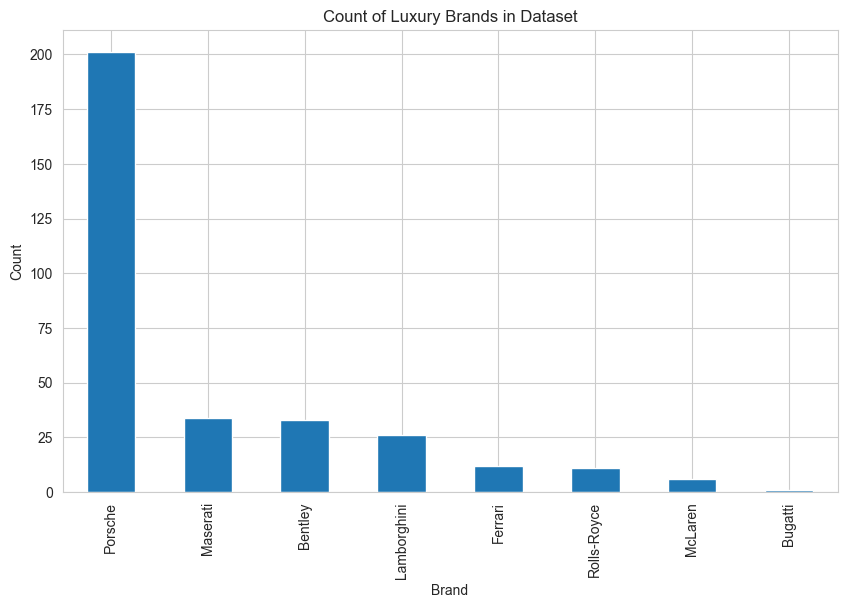

In [214]:
# Define the list of luxury car brands
luxury_brands = ['Bugatti', 'Maserati', 'Porsche', 'Ferrari', 'Lamborghini', 
                 'Bentley', 'Rolls-Royce', 'Aston Martin', 'McLaren', '']

# Filter the dataset for luxury brands
luxury_cars = df[df['brand'].isin(luxury_brands)]

# Count the occurrences of each luxury brand
luxury_counts = luxury_cars['brand'].value_counts()

# Display the results
print("Luxury Car Counts:")
print(luxury_counts)

# Visualize the counts
luxury_counts.plot(kind='bar', figsize=(10, 6), title='Count of Luxury Brands in Dataset')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

In [215]:
#   df = df[~((df['brand'] == 'Bugatti') & 
#          (df['model'].str.contains('Veyron 16.4 Grand Sport', na=False)) & 
#          (df['model_year'] == 2011))]


Value Counts for brand:


brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Bugatti            1
Plymouth           1
smart              1
Maybach            1
Suzuki             1
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_28911/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


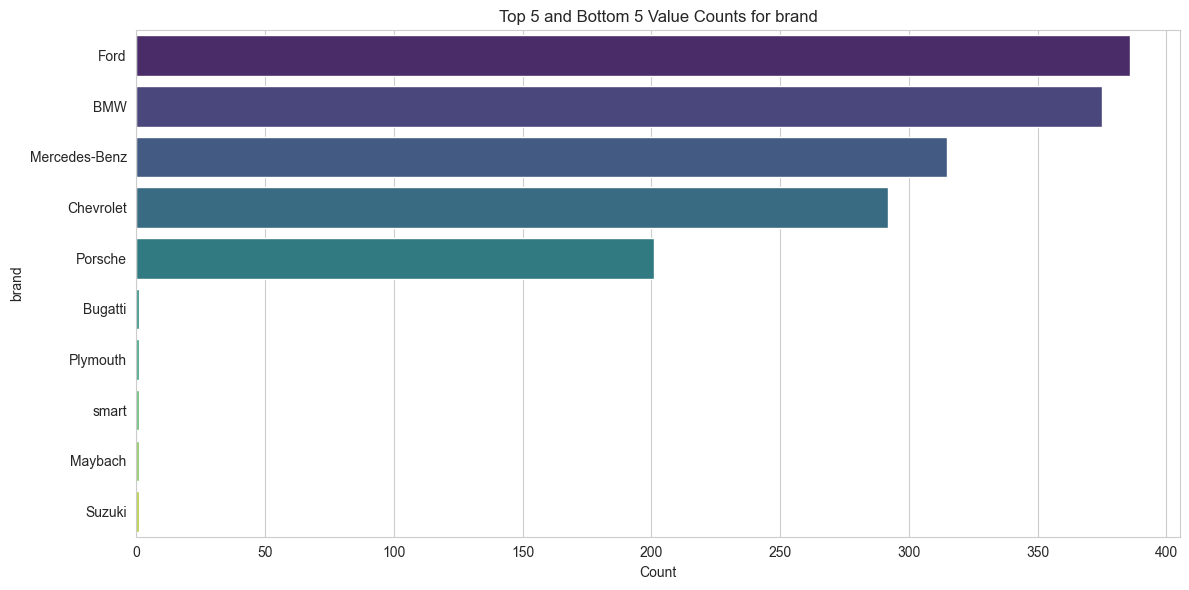


Value Counts for model:


model
M3 Base                    30
F-150 XLT                  24
Corvette Base              22
1500 Laramie               18
Camaro 2SS                 17
XE 25t                      1
MC20 Base                   1
911 Carrera 4 Cabriolet     1
488 GTB Base                1
Taycan                      1
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_28911/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


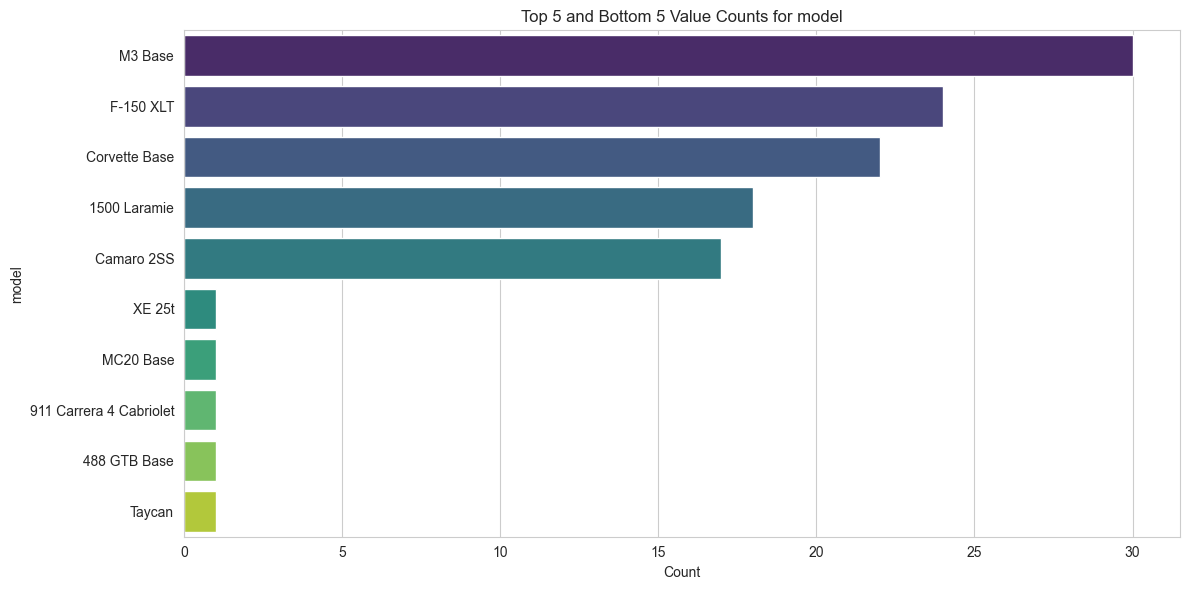


Value Counts for fuel_type:


fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_28911/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


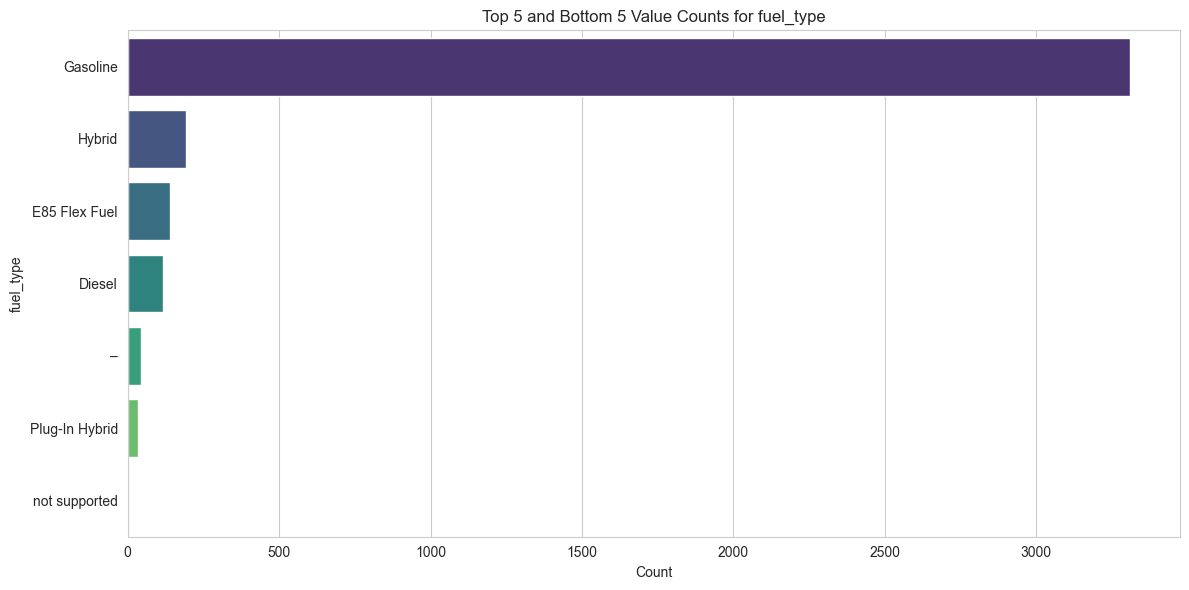


Value Counts for transmission:


transmission
A/T                                              1037
8-Speed A/T                                       406
Transmission w/Dual Shift Mode                    398
6-Speed A/T                                       362
6-Speed M/T                                       248
Automatic, 8-Spd PDK Dual-Clutch                    1
Auto, 6-Spd w/CmdShft                               1
Automatic, 8-Spd Sport w/Sport & Manual Modes       1
CVT-F                                               1
8-Speed Manual                                      1
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_28911/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


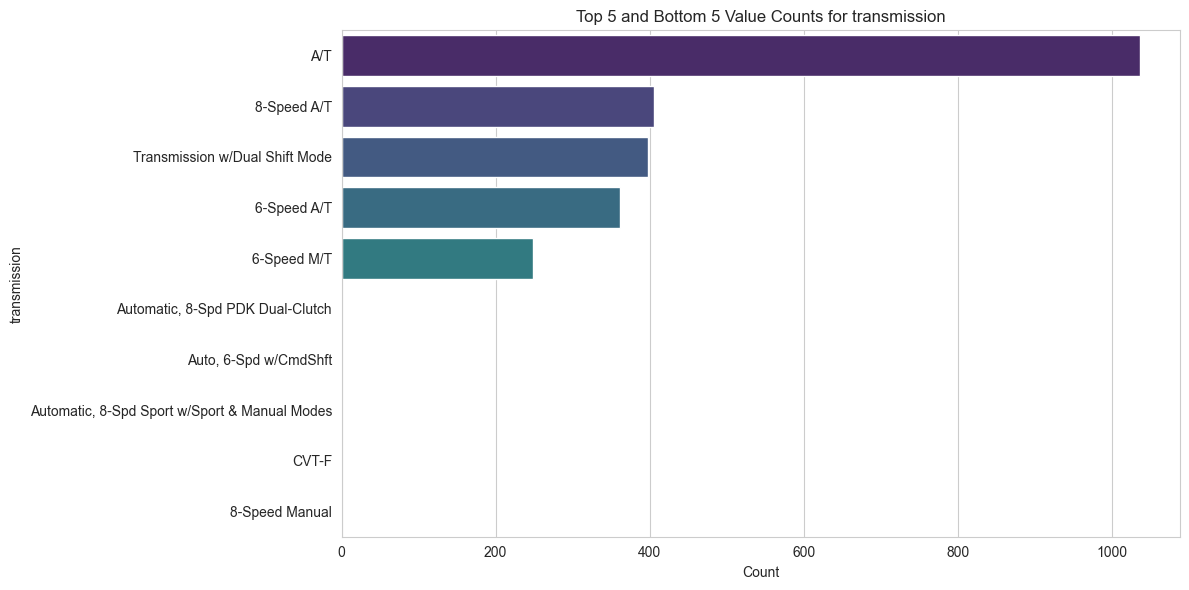


Value Counts for ext_col:


ext_col
Black                       905
White                       816
Gray                        496
Silver                      374
Blue                        349
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_28911/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


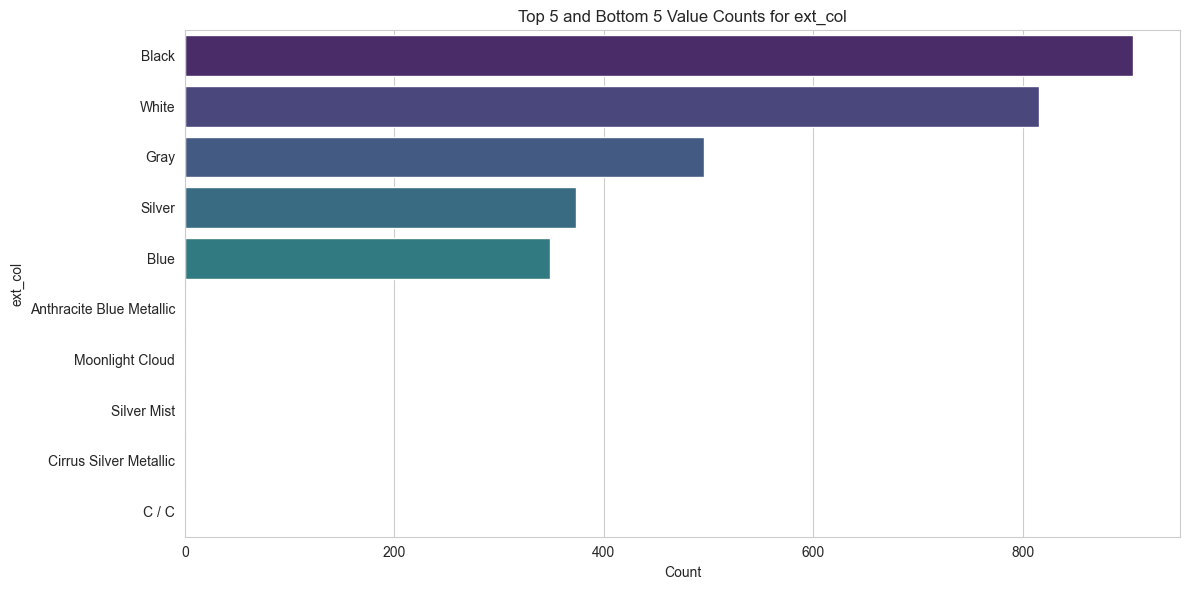


Value Counts for int_col:


int_col
Black               2025
Beige                538
Gray                 472
Brown                157
–                    133
Almond Beige           1
Kyalami Orange         1
Sakhir Orange          1
Tan/Ebony              1
Black / Graphite       1
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_28911/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


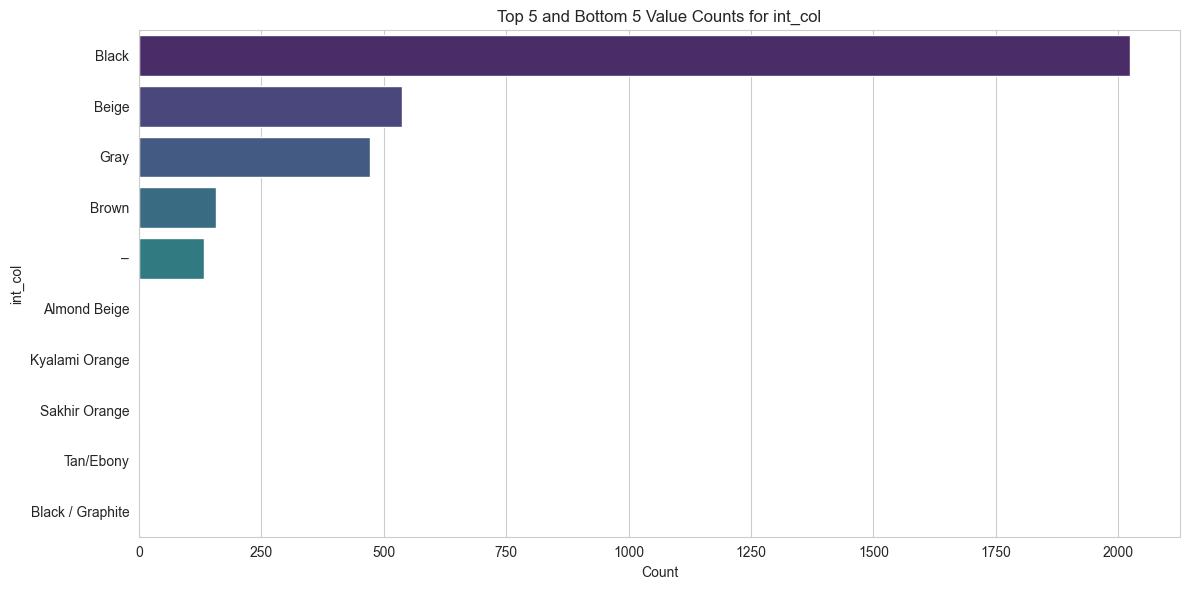


Value Counts for clean_title:


clean_title
Yes    3413
Yes    3413
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_28911/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


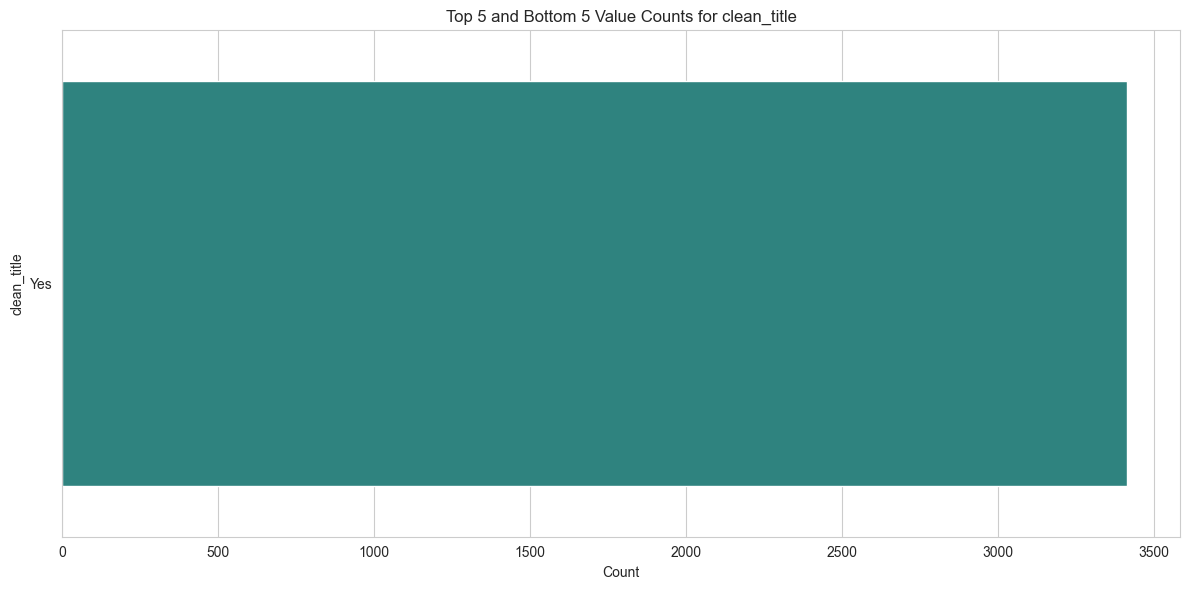


Value Counts for accident:


accident
None reported                             2910
At least 1 accident or damage reported     986
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_28911/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


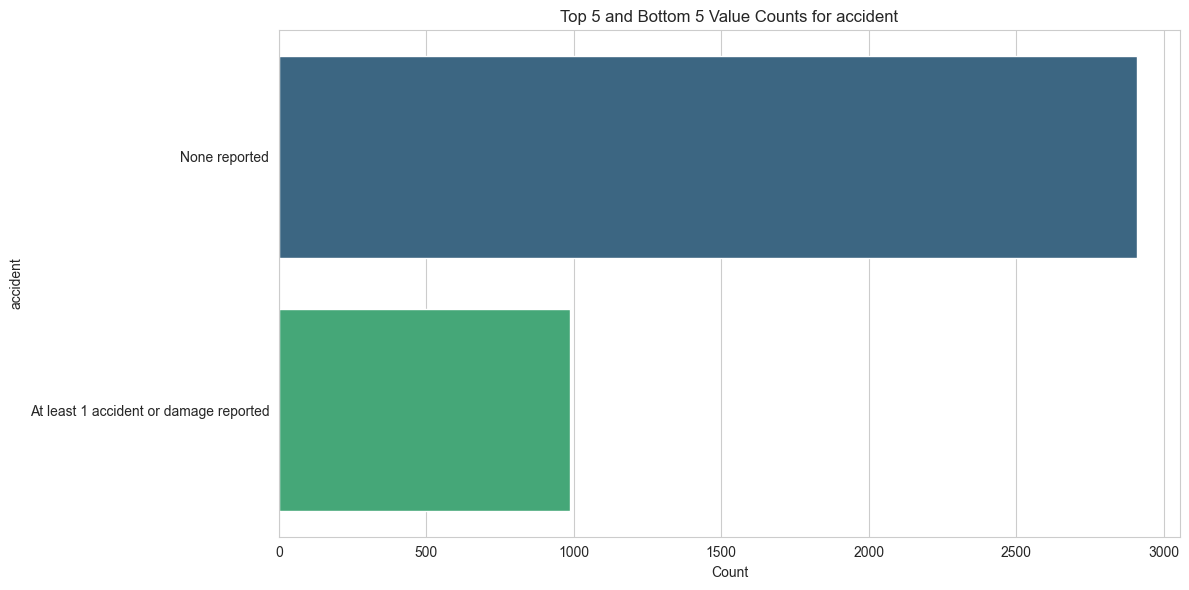

In [269]:
# Categorical features (adjust list if needed)
possible_cats = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'clean_title', 'accident']
categorical_features = [c for c in possible_cats if c in df.columns]

for cat in categorical_features:
    print(f"\nValue Counts for {cat}:")
    
    # Get value counts
    value_counts = df[cat].value_counts()

    # Display top 5 and bottom 5
    top_5 = value_counts.head(5)
    bottom_5 = value_counts.tail(5)
    combined = pd.concat([top_5, bottom_5])
    display(combined)
    
    # Horizontal bar plot for combined counts
    plt.figure(figsize=(12, 6))  # Adjust size dynamically
    sns.barplot(
        x=combined.values, 
        y=combined.index, 
        palette='viridis'
    )
    plt.title(f"Top 5 and Bottom 5 Value Counts for {cat}")
    plt.xlabel("Count")
    plt.ylabel(cat)
    plt.tight_layout()
    plt.show()


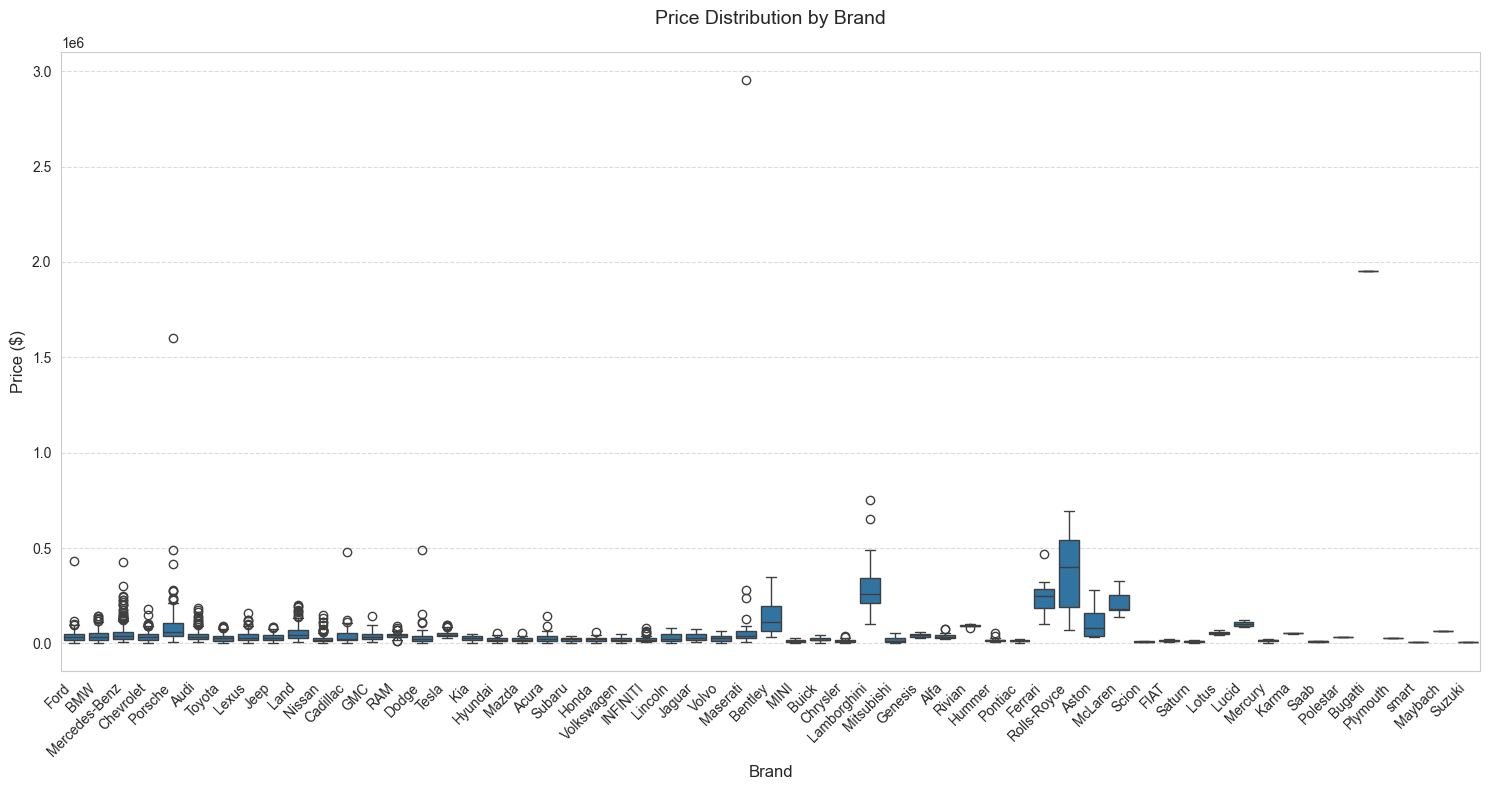

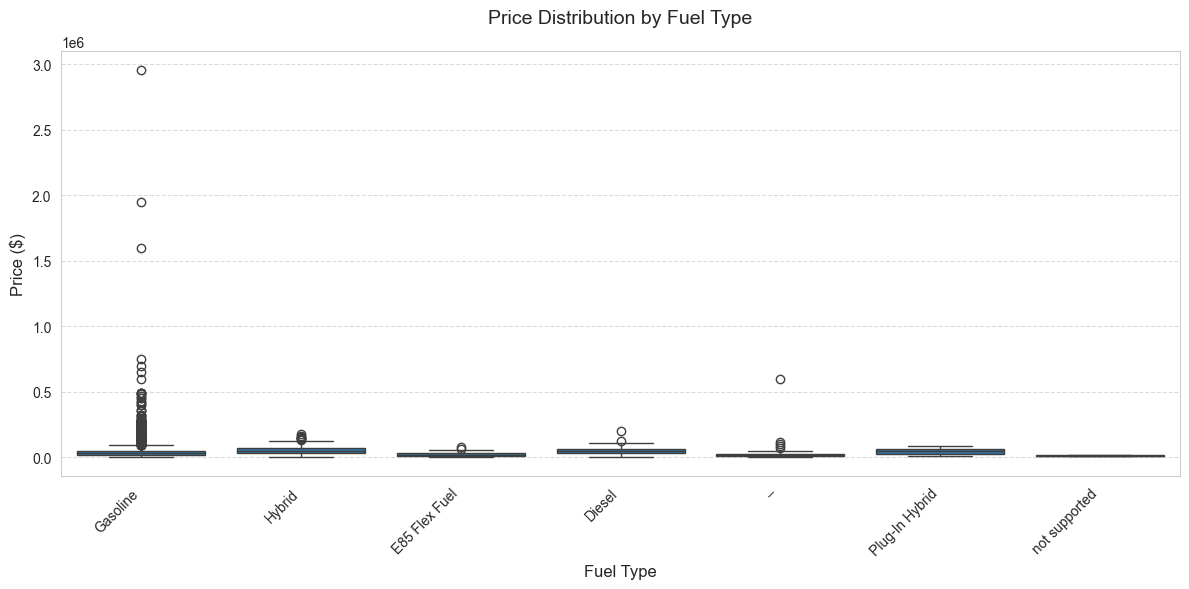

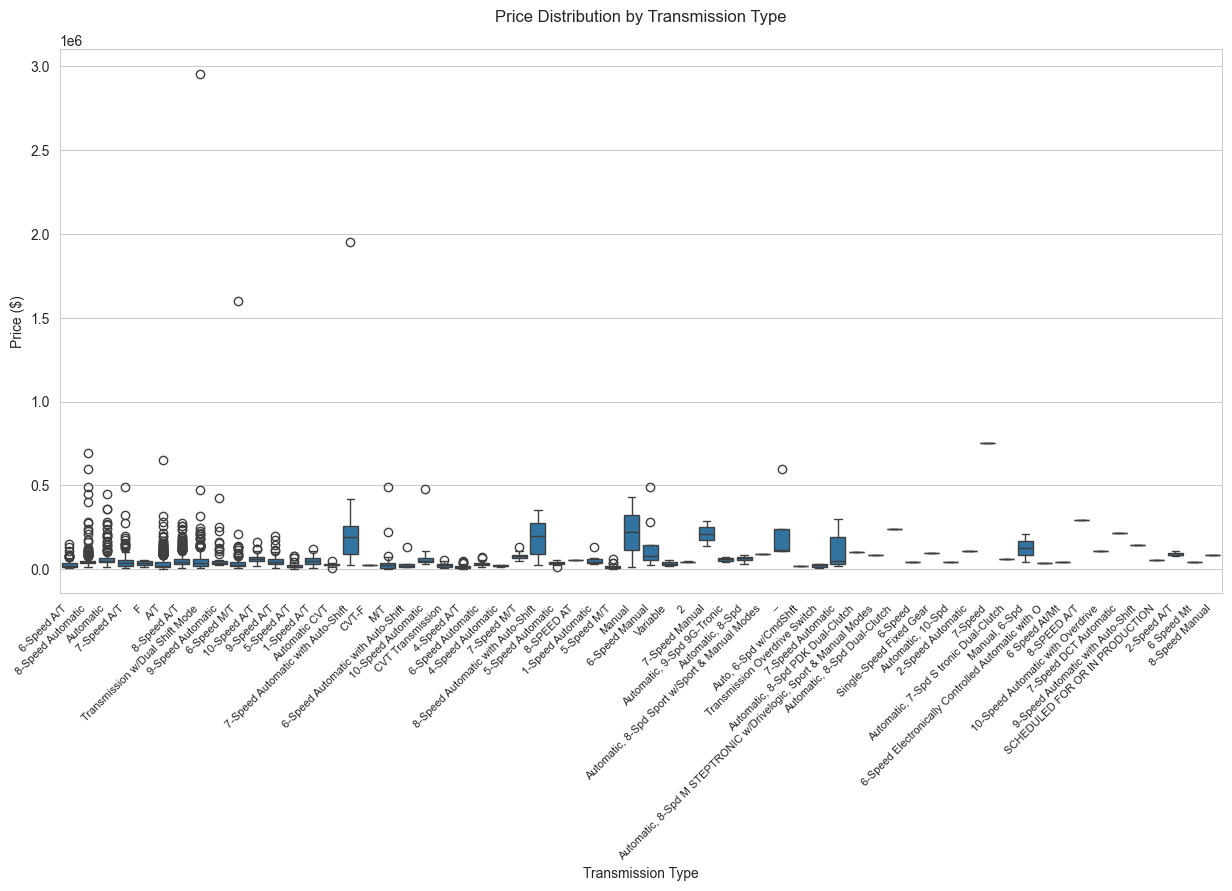

In [217]:
# Price Distribution by Brand
plt.figure(figsize=(15, 8))
sns.boxplot(x='brand', y='price', data=df, order=df['brand'].value_counts().index)

# Customize the plot
plt.title('Price Distribution by Brand', pad=20, fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Price Distribution by Fuel Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel_type', y='price', data=df, order=df['fuel_type'].value_counts().index)

# Customize the plot
plt.title('Price Distribution by Fuel Type', pad=20, fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(x='transmission', y='price', data=df)

# Customize the plot
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Price Distribution by Transmission Type', pad=20)
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')

# Add more space at the bottom for labels
plt.subplots_adjust(bottom=0.2)

plt.show()


/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_28911/1416031507.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_means.index, y=brand_means.values,


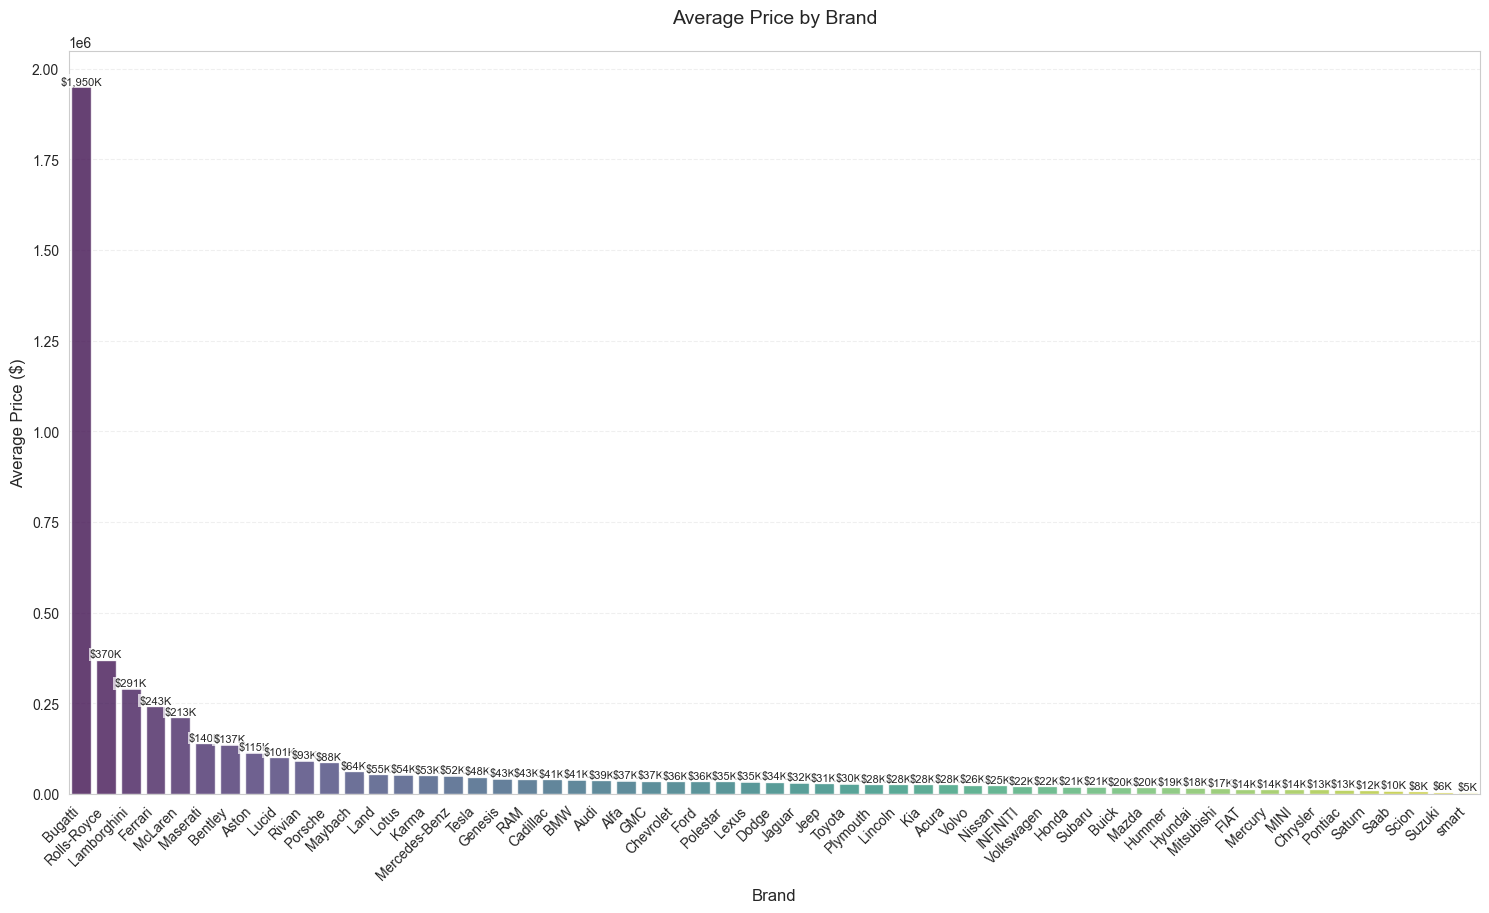

In [218]:
# Calculate mean prices by brand
brand_means = df.groupby('brand')['price'].mean().sort_values(ascending=False)

# Create figure with more height to accommodate labels
plt.figure(figsize=(15, 10))

# Create bar plot with custom styling
ax = sns.barplot(x=brand_means.index, y=brand_means.values, 
                palette='viridis',
                alpha=0.8)

# Customize the plot
plt.title('Average Price by Brand', pad=20, fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

# Rotate and align the tick labels so they look better
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on top of each bar with adjusted position and format
for i, v in enumerate(brand_means.values):
    # Add labels with some vertical offset and smaller font
    if v > 1000:  # Format differently for larger numbers
        label = f'${int(v/1000):,}K'
    else:
        label = f'${int(v):,}'
    
    ax.text(i, v, label,
            ha='center', va='bottom',
            fontsize=8,
            rotation=0,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Adjust bottom margin to prevent x-label cutoff
plt.subplots_adjust(bottom=0.2)

plt.show()

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_28911/2195663275.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_means.index, y=brand_means.values,


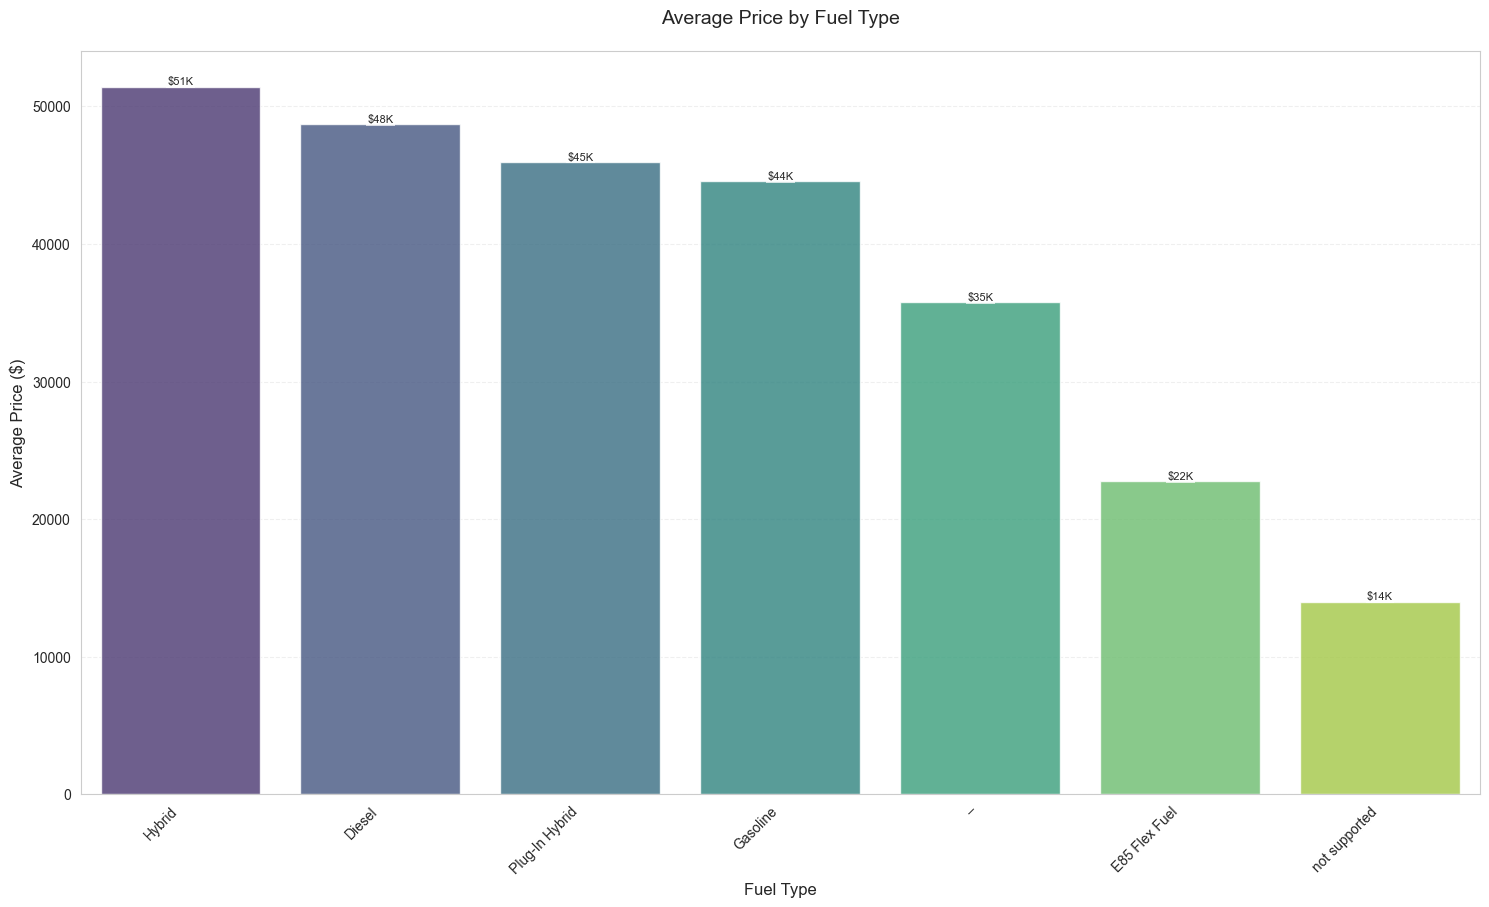

In [219]:
# Calculate mean prices by brand
brand_means = df.groupby('fuel_type')['price'].mean().sort_values(ascending=False)

# Create figure with more height to accommodate labels
plt.figure(figsize=(15, 10))

# Create bar plot with custom styling
ax = sns.barplot(x=brand_means.index, y=brand_means.values, 
                palette='viridis',
                alpha=0.8)

# Customize the plot
plt.title('Average Price by Fuel Type', pad=20, fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

# Rotate and align the tick labels so they look better
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on top of each bar with adjusted position and format
for i, v in enumerate(brand_means.values):
    # Add labels with some vertical offset and smaller font
    if v > 1000:  # Format differently for larger numbers
        label = f'${int(v/1000):,}K'
    else:
        label = f'${int(v):,}'
    
    ax.text(i, v, label,
            ha='center', va='bottom',
            fontsize=8,
            rotation=0,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Adjust bottom margin to prevent x-label cutoff
plt.subplots_adjust(bottom=0.2)

plt.show()

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_28911/144577368.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_means.index, y=brand_means.values,


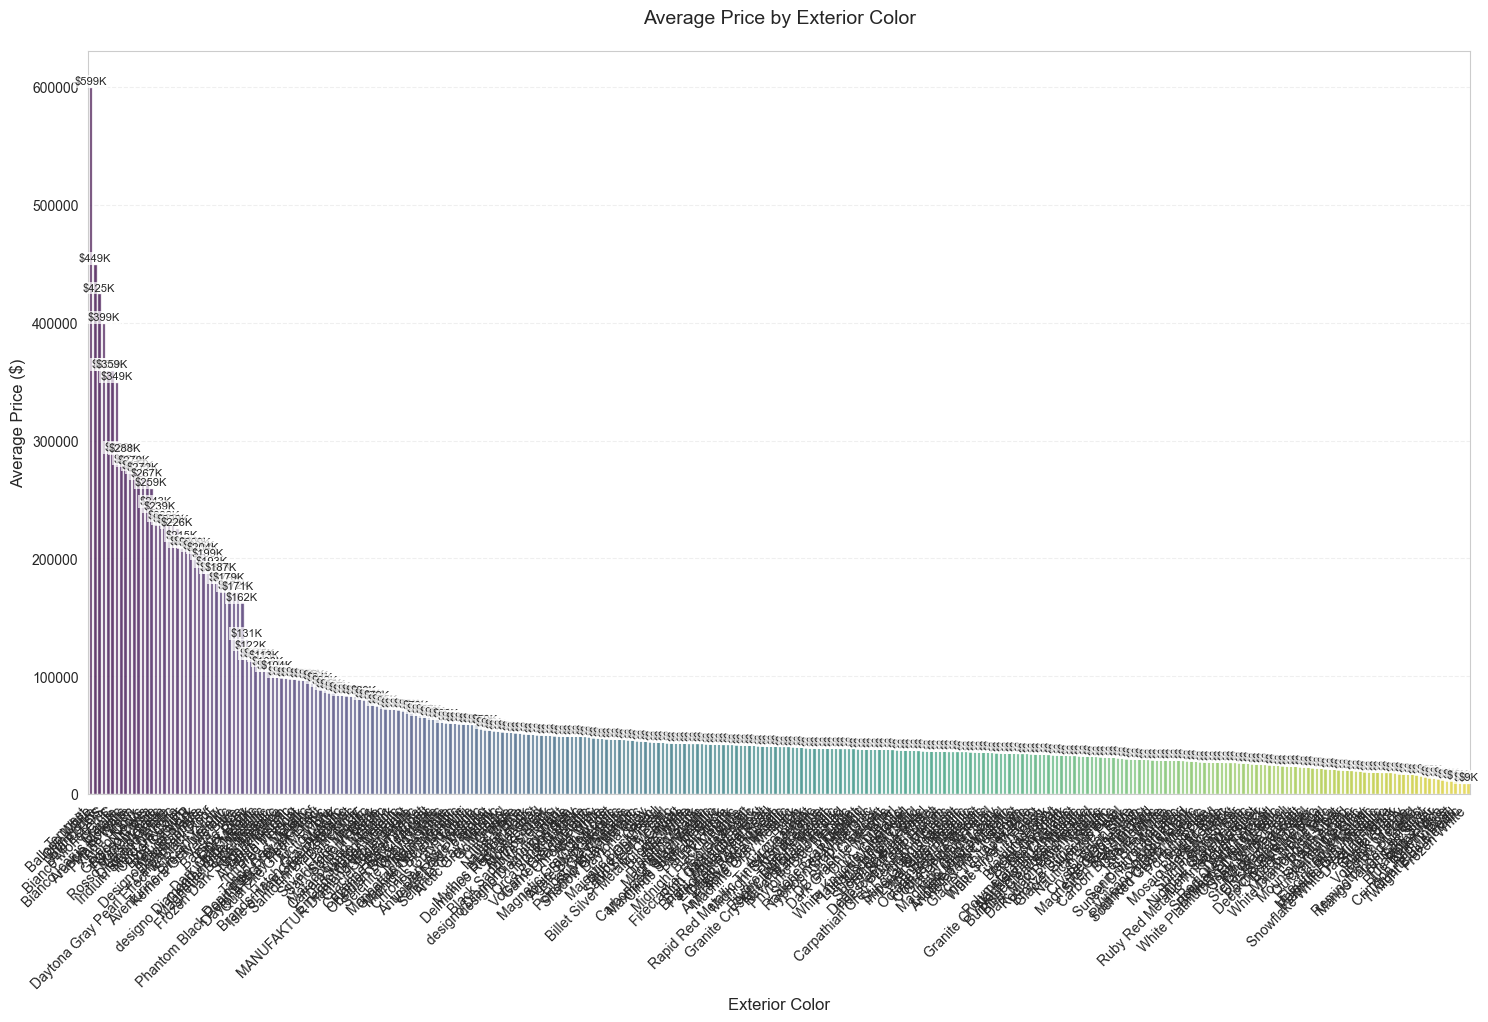

In [220]:
# Calculate mean prices by brand
brand_means = df.groupby('ext_col')['price'].mean().sort_values(ascending=False)

# Create figure with more height to accommodate labels
plt.figure(figsize=(15, 10))

# Create bar plot with custom styling
ax = sns.barplot(x=brand_means.index, y=brand_means.values, 
                palette='viridis',
                alpha=0.8)

# Customize the plot
plt.title('Average Price by Exterior Color', pad=20, fontsize=14)
plt.xlabel('Exterior Color', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

# Rotate and align the tick labels so they look better
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on top of each bar with adjusted position and format
for i, v in enumerate(brand_means.values):
    # Add labels with some vertical offset and smaller font
    if v > 1000:  # Format differently for larger numbers
        label = f'${int(v/1000):,}K'
    else:
        label = f'${int(v):,}'
    
    ax.text(i, v, label,
            ha='center', va='bottom',
            fontsize=8,
            rotation=0,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Adjust bottom margin to prevent x-label cutoff
plt.subplots_adjust(bottom=0.2)

plt.show()

In [221]:
print(df['ext_col'].unique())

['Black' 'Moonlight Cloud' 'Blue' 'Glacier White Metallic' 'Silver'
 'Green' 'Fuji White' 'Yellow' 'White' 'Gray' 'Purple'
 'Iconic Silver Metallic' 'Mythos Black Metallic' 'Red' 'Gold'
 'Lunar Silver Metallic' 'Mountain Air Metallic' 'Caspian Blue'
 'Tango Red Metallic' '–' 'Alpine White' 'BLU ELEOS' 'Horizon Blue'
 'Granite Crystal Clearcoat Metallic' 'Orange' 'Beige' 'Rift Metallic'
 'Atomic Silver' 'Summit White' 'Imperial Blue Metallic'
 'Magnetic Gray Clearcoat' 'Bright White Clearcoat' 'Typhoon Gray'
 'Crystal Black Silica' 'Arctic Gray Metallic' 'Selenite Grey Metallic'
 'Ultra Black' 'Lunare White Metallic' 'Hyper Red'
 'Daytona Gray Pearl Effect' 'Vik Black' 'Pacific Blue Metallic'
 'Obsidian Black Metallic' 'Silver Ice Metallic' 'Sonic Silver Metallic'
 'Nightfall Mica' 'Apex Blue' 'Go Mango!' 'Ingot Silver Metallic'
 'Midnight Black Metallic' 'Black Clearcoat' 'Thunder Gray'
 'Bianco Monocerus' 'Verde' 'Wind Chill Pearl' 'Mythos Black'
 'Patriot Blue Pearlcoat' 'Black Cherr

In [222]:
print(df['int_col'].unique())

['Black' 'Gray' 'Ebony.' 'Green' 'Pimento / Ebony' 'Brown' 'White' '–'
 'Beige' 'Jet Black' 'Light Gray' 'Anthracite' 'Red' 'Nero Ade' 'Blue'
 'Charcoal' 'Rioja Red' 'Canberra Beige/Black' 'Roast' 'Ivory / Ebony'
 'Silk Beige/Black' 'Medium Pewter' 'Ice' 'Black / Express Red'
 'Obsidian Black' 'Ebony' 'Orange' 'Caramel' 'Orchid' 'Graphite'
 'Tan/Ebony' 'Cappuccino' 'Nero' 'Sahara Tan' 'BLACK' 'Hotspur' 'Blk'
 'Black Onyx' 'Nougat Brown' 'Titan Black' 'Oyster W/Contrast' 'Silver'
 'Macchiato Beige/Black' 'Sand Beige' 'Navy Pier' 'WHITE' 'Parchment.'
 'Sarder Brown' 'Grace White' 'Cloud' 'Espresso' 'Mesa' 'Whisper Beige'
 'Medium Dark Slate' 'Gold' 'Camel Leather' 'Tupelo' 'Black/Red'
 'Parchment' 'Beluga Hide' 'Charles Blue' 'Global Black'
 'Titan Black / Quarzit' 'Mocha' 'Portland' 'Medium Light Camel'
 'Black / Saddle' 'Ash' 'Ebony / Pimento' 'Tan' 'Mistral Gray / Raven'
 'Graystone' 'Satin Black' 'Sandstone' 'Medium Stone' 'ORANGE'
 'Pimento Red w/Ebony' 'Macchiato' 'Ebony Black' 'Pe

<Figure size 2000x1000 with 0 Axes>

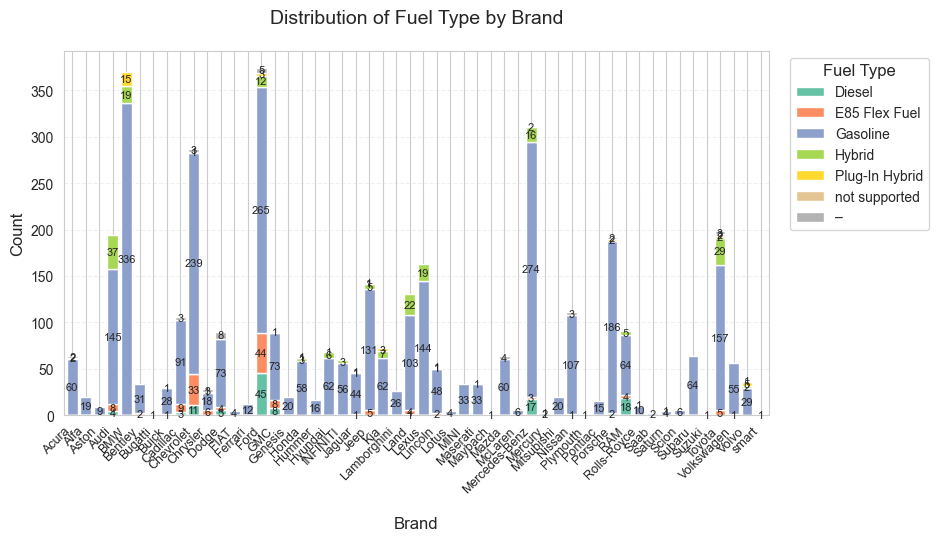

In [223]:
# Create the cross tabulation
cross_tab = pd.crosstab(df['brand'], df['fuel_type'])

# Create figure with more height and width
plt.figure(figsize=(20, 10))

# Create the stacked bar plot
ax = cross_tab.plot(kind='bar', 
                   stacked=True, 
                   width=0.8,
                   colormap='Set2')

# Customize the plot
plt.title('Distribution of Fuel Type by Brand', pad=20, fontsize=14)
plt.xlabel('Brand', fontsize=12, labelpad=15)  # Added labelpad for spacing
plt.ylabel('Count', fontsize=12)

# Improve tick labels with more spacing and clearer formatting
plt.xticks(rotation=45, ha='right', fontsize=9)
ax.set_xticklabels(ax.get_xticklabels(), linespacing=1.2)  # Increase spacing between wrapped labels

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3, zorder=0)

# Enhance legend with better positioning
plt.legend(title='Fuel Type', 
          bbox_to_anchor=(1.02, 1),  # Slightly adjusted position
          loc='upper left',
          fontsize=10,
          title_fontsize=12)

# Add value labels on the bars
for c in ax.containers:
    # Only show labels for values > 0
    ax.bar_label(c, label_type='center', fmt=lambda x: int(x) if x > 0 else '', 
                fontsize=8)

# Adjust subplot parameters
plt.subplots_adjust(bottom=0.2)  # More space at bottom for labels

# Use tight_layout with adjusted bounds
plt.tight_layout(rect=[0, 0.03, 0.95, 0.95])  # [left, bottom, right, top]

plt.show()

In [224]:
print(df['fuel_type'].unique())

['E85 Flex Fuel' 'Gasoline' 'Hybrid' nan 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']


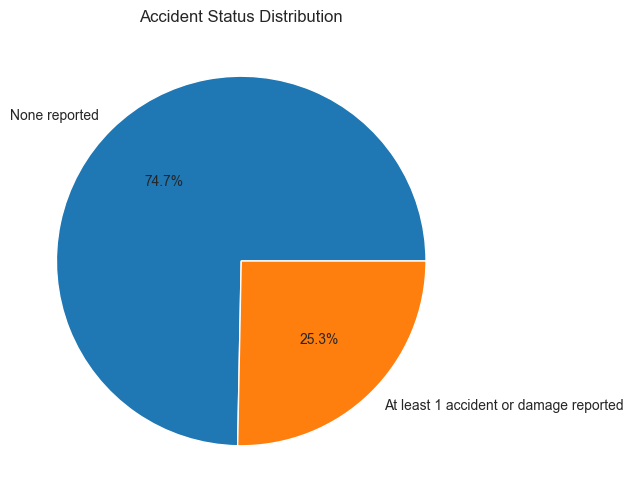

In [225]:
df['accident'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Accident Status Distribution')
plt.ylabel('')
plt.show()


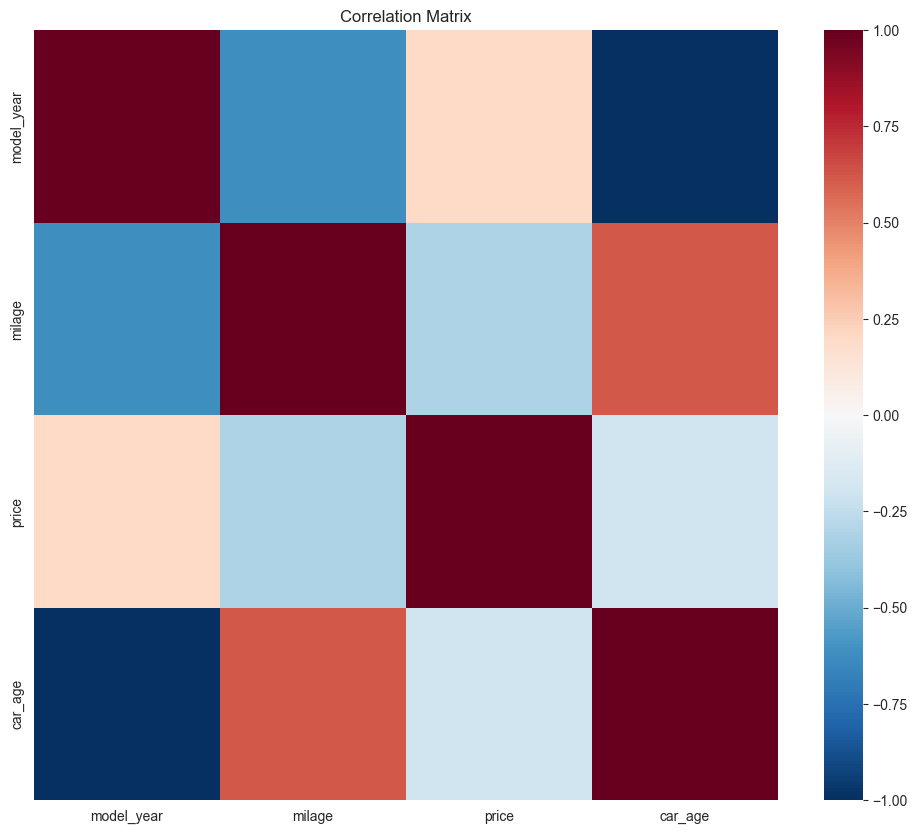


Correlation of Features with Price:
price         1.000000
model_year    0.199496
car_age      -0.199496
milage       -0.305528
Name: price, dtype: float64

Variance Inflation Factors:
      feature       VIF
0  model_year  3.137891
1      milage  1.617020
2     car_age  4.723297


In [226]:
# Correlation matrix
num_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0)
plt.title('Correlation Matrix')
plt.show()

# Price correlation if applicable
if 'price' in df.columns:
    price_corr = corr_matrix['price'].sort_values(ascending=False)
    print("\nCorrelation of Features with Price:")
    print(price_corr)

# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[num_cols].drop(['price','price_log'], axis=1, errors='ignore')  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)

# Based on VIF and correlation, drop or combine features as needed
# (User decision on which to drop)


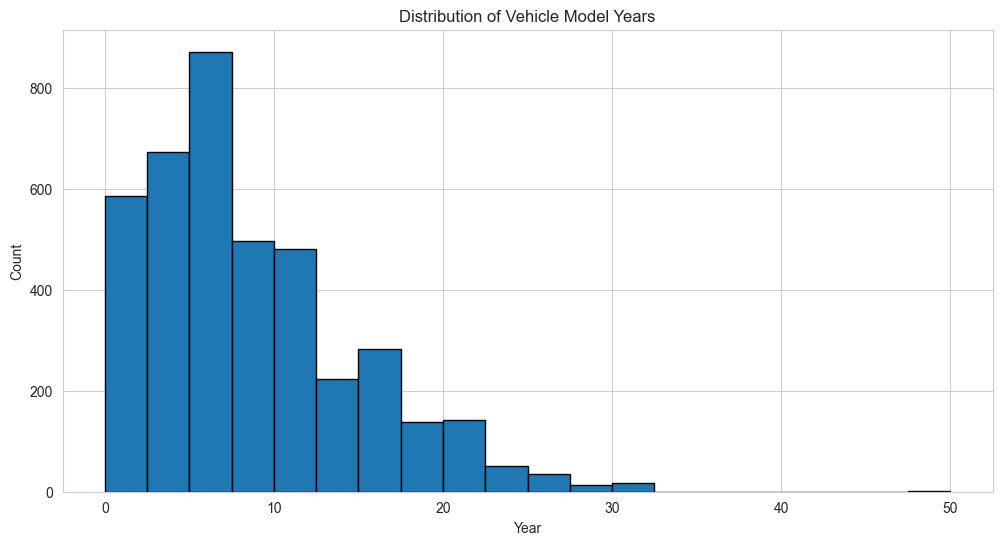

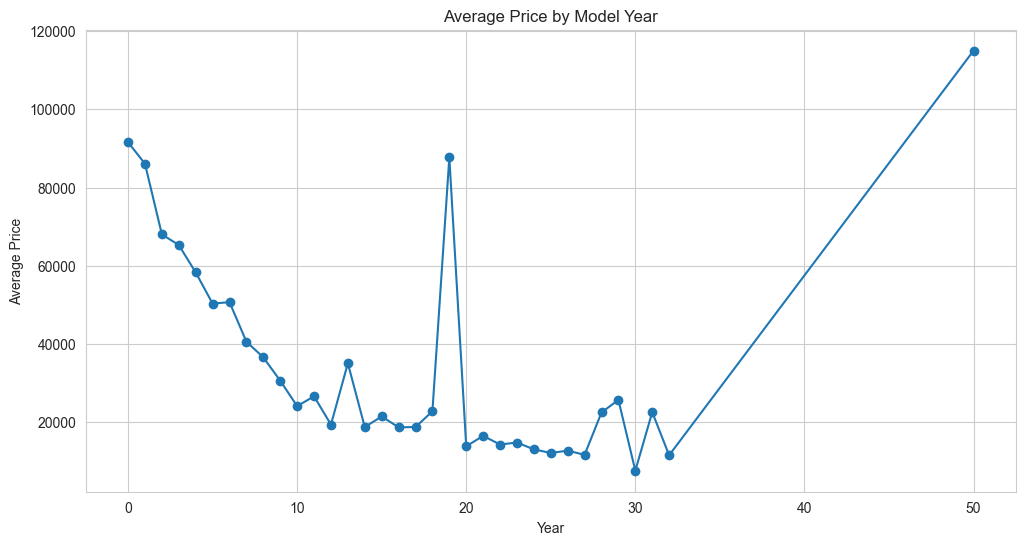

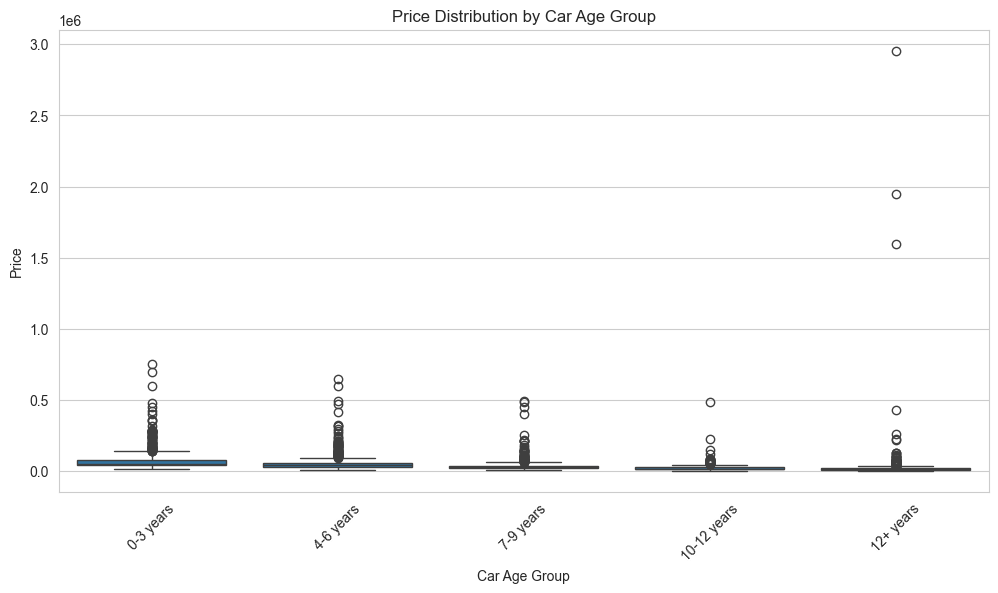

TypeError: 'Axes' object is not subscriptable

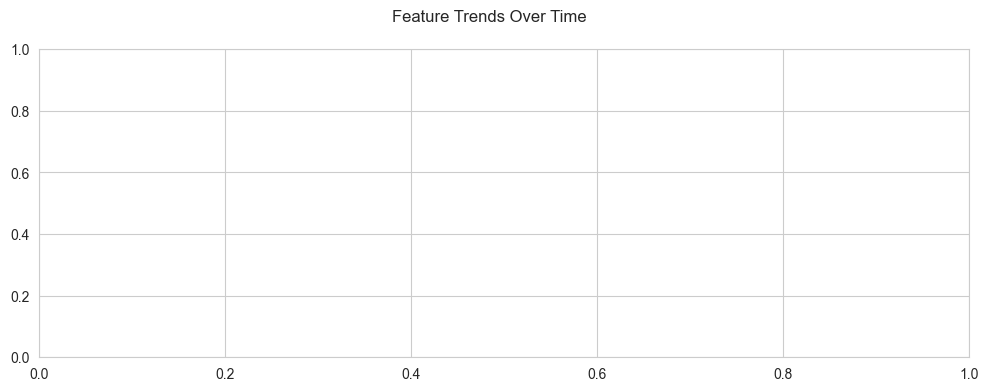

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Calculate vehicle age
current_year = datetime.now().year

# Create age groups
df['age_group'] = pd.cut(df['car_age'], 
                        bins=[0, 3, 6, 9, 12, float('inf')],
                        labels=['0-3 years', '4-6 years', '7-9 years', '10-12 years', '12+ years'])

# 1. Distribution of Model Years
plt.figure(figsize=(12, 6))
plt.hist(df['car_age'], bins=20, edgecolor='black')
plt.title('Distribution of Vehicle Model Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 2. Average Price by Model Year
plt.figure(figsize=(12, 6))
year_price = df.groupby('car_age')['price'].mean()
plt.plot(year_price.index, year_price.values, marker='o')
plt.title('Average Price by Model Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# 3. Box Plot of Prices by Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='price', data=df)
plt.title('Price Distribution by Car Age Group')
plt.xlabel('Car Age Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# 4. Feature Trends Over Time
numeric_features = ['milage']
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(12, 4*len(numeric_features)))
fig.suptitle('Feature Trends Over Time')

for i, feature in enumerate(numeric_features):
    sns.regplot(x='car_age', y=feature, data=df, ax=axes[i], scatter_kws={'alpha':0.5})
    axes[i].set_title(f'{feature} vs Year')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# 5. Summary Statistics by Age Group
age_group_stats = df.groupby('age_group').agg({
    'price': ['mean', 'std', 'count'],
    'milage': 'mean',
}).round(2)

print("\nSummary Statistics by Age Group:")
print(age_group_stats)

# 6. Correlation between Age and Other Features
age_correlations = df[['car_age', 'price', 'milage']].corr()['car_age'].sort_values(ascending=False)

print("\nCorrelations with Car Age:")
print(age_correlations)

# Step 4: Data Cleaning & Preprocessing
- Handle missing values by imputation.
- Ensure numeric columns are properly typed (e.g., price, mileage).
- Address and remove invalid data points if necessary.

**Validation Criteria:**
- No or minimal missing values remain after imputation.
- All numeric columns converted to appropriate numeric types.


In [228]:
# Drop the 'clean_title' column
if 'clean_title' in df.columns:
    df = df.drop(columns=['clean_title'])

# Remove Bugatti from the dataset
df = df[df['brand'] != 'Bugatti']

# Remove cars with car_age of 0
if 'car_age' in df.columns:
    df = df[df['car_age'] != 0]

# Verify the operations
print("Columns in DataFrame after dropping 'clean_title':", df.columns)
print(f"Number of rows after removing Bugatti and car_age = 0: {df.shape[0]}")


Columns in DataFrame after dropping 'clean_title': Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'price', 'car_age',
       'age_group'],
      dtype='object')
Number of rows after removing Bugatti and car_age = 0: 4002


In [229]:
import spacy
from sklearn.cluster import KMeans
import numpy as np

# Load the spaCy model for embeddings
nlp = spacy.load('en_core_web_md')


In [230]:
colors = df['ext_col'].unique()

color_vectors = []
valid_colors = []  # To keep track of colors that have valid embeddings
for color in colors:
    doc = nlp(color.lower())
    # Filter tokens that have vectors (some punctuation or unknown words may have no vectors)
    token_vectors = [token.vector for token in doc if token.has_vector]
    if len(token_vectors) > 0:
        vector = np.mean(token_vectors, axis=0)  # Average embedding for the color name
        color_vectors.append(vector)
        valid_colors.append(color)


In [231]:
k = 10 # You can experiment with values like 5, 10, 15, etc.
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(color_vectors)


In [232]:
from collections import defaultdict

cluster_dict = defaultdict(list)
for col_name, lbl in zip(valid_colors, labels):
    cluster_dict[lbl].append(col_name)

for cluster_id, col_list in cluster_dict.items():
    print(f"Cluster {cluster_id}:")
    print(col_list)
    print("\n")


Cluster 3:
['Black', 'Ultra Black', 'Vik Black', 'Black Clearcoat', 'Mythos Black', 'Black Cherry', 'BLACK', 'Beluga Black', 'Ebony Black', 'Midnight Black', 'Santorin Black', 'Brilliant Black', 'Twilight Black', 'Diamond Black', 'Santorini Black', 'Onyx Black', 'Tan', 'Magnetic Black', 'Shadow Black', 'Aurora Black', 'Black Raven', 'Phantom Black', 'Crystal Black', 'Super Black']


Cluster 0:
['Moonlight Cloud', 'Blue', 'Caspian Blue', 'Horizon Blue', 'Apex Blue', 'Patriot Blue Pearlcoat', 'BLUE', 'Hydro Blue Pearlcoat', 'Navarra Blue', 'Pacific Blue', 'Navarre Blue', 'Vega Blue', 'Bayside Blue', 'Fountain Blue', 'Blue Caelum', 'China Blue', 'Kinetic Blue']


Cluster 2:
['Glacier White Metallic', 'Fuji White', 'Yellow', 'White', 'Alpine White', 'Summit White', 'Bright White Clearcoat', 'Lunare White Metallic', 'Yulong White', 'Ibis White', 'Quartz White', 'Pure White', 'Snow White Pearl', 'MANUFAKTUR Diamond White Bright', 'Pearl White', 'Oxford White', 'Glacier White', 'White Clearco

In [233]:
color_to_cluster = {c: l for c, l in zip(valid_colors, labels)}

# For colors that didn't produce embeddings (extremely unlikely, but just in case), assign them to 'Other' or a default cluster
df['ext_col_cluster'] = df['ext_col'].apply(lambda x: color_to_cluster.get(x, 'Other'))


                   ext_col ext_col_cluster     ext_col_cluster_named
0                    Black               3              Black Shades
1          Moonlight Cloud               0               Blue Shades
2                     Blue               0               Blue Shades
3                    Black               3              Black Shades
4   Glacier White Metallic               2   White & Light Metallics
5                   Silver               7  Silver, Gold & Metallics
6                     Blue               0               Blue Shades
7                    Green               4       Red and Earth Tones
8                    Black               3              Black Shades
9                    Black               3              Black Shades
10              Fuji White               2   White & Light Metallics
11                  Silver               7  Silver, Gold & Metallics
12                  Yellow               2   White & Light Metallics
13                   Black        

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_28911/414162373.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='ext_col_cluster_named', data=df, order=cluster_names.values(), palette='viridis')


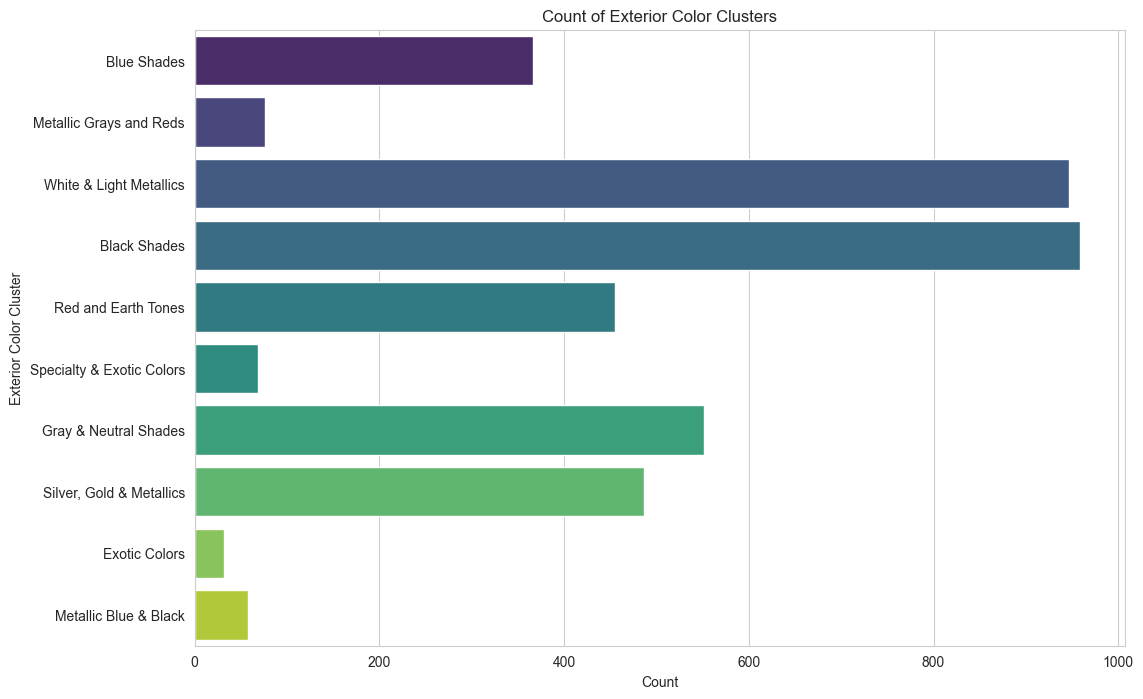

In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the cluster names based on the suggestions
cluster_names = {
    0: "Blue Shades",
    1: "Metallic Grays and Reds",
    2: "White & Light Metallics",
    3: "Black Shades",
    4: "Red and Earth Tones",
    5: "Specialty & Exotic Colors",
    6: "Gray & Neutral Shades",
    7: "Silver, Gold & Metallics",
    8: "Exotic Colors",
    9: "Metallic Blue & Black"
}

# Assign the cluster names to a new column
df['ext_col_cluster_named'] = df['ext_col_cluster'].map(cluster_names)

# Verify the new column
print(df[['ext_col', 'ext_col_cluster', 'ext_col_cluster_named']].head(20))

# Visualize the distribution of the new clusters
plt.figure(figsize=(12,8))
sns.countplot(y='ext_col_cluster_named', data=df, order=cluster_names.values(), palette='viridis')
plt.title('Count of Exterior Color Clusters')
plt.xlabel('Count')
plt.ylabel('Exterior Color Cluster')
plt.show()


In [235]:
int_colors = df['int_col'].unique()

color_vectors = []
valid_colors = []  # To keep track of colors that have valid embeddings
for color in int_colors:
    doc = nlp(color.lower())
    # Filter tokens that have vectors (some punctuation or unknown words may have no vectors)
    token_vectors = [token.vector for token in doc if token.has_vector]
    if len(token_vectors) > 0:
        vector = np.mean(token_vectors, axis=0)  # Average embedding for the color name
        color_vectors.append(vector)
        valid_colors.append(color)
        
k = 4 # You can experiment with values like 5, 10, 15, etc.
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(color_vectors)

from collections import defaultdict

cluster_dict = defaultdict(list)
for col_name, lbl in zip(valid_colors, labels):
    cluster_dict[lbl].append(col_name)

for cluster_id, col_list in cluster_dict.items():
    print(f"Cluster {cluster_id}:")
    print(col_list)
    print("\n")

Cluster 1:
['Black', 'Ebony.', 'Pimento / Ebony', '–', 'Jet Black', 'Blue', 'Canberra Beige/Black', 'Ivory / Ebony', 'Black / Express Red', 'Obsidian Black', 'Ebony', 'Tan/Ebony', 'Sahara Tan', 'BLACK', 'Black Onyx', 'Titan Black', 'Silver', 'Macchiato Beige/Black', 'Gold', 'Black/Red', 'Charles Blue', 'Global Black', 'Titan Black / Quarzit', 'Black / Saddle', 'Ebony / Pimento', 'Tan', 'Mistral Gray / Raven', 'Satin Black', 'Pimento Red w/Ebony', 'Ebony Black', 'Diesel Gray / Black', 'Charcoal Black', 'Tan/Ebony/Ebony', 'Amber', 'Black / Brown', 'Sakhir Orange/Black', 'AMG Black', 'Light Titanium', 'Platinum', 'Ebony/Light Oyster Stitch', 'Red/Black', 'Rhapsody Blue', 'Light Platinum / Jet Black', 'Black w/Red Stitching', 'Black/Saddle Brown', 'Black/Gun Metal', 'Oyster/Black', 'Red / Black', 'Ebony / Ebony Accents', 'Carbon Black', 'Sport', 'Black/Graphite', 'Gray w/Blue Bolsters', 'Black / Gray', 'Black / Graphite']


Cluster 2:
['Gray', 'Beige', 'Light Gray', 'Anthracite', 'Silk Bei

In [236]:
color_to_cluster = {c: l for c, l in zip(valid_colors, labels)}

# For colors that didn't produce embeddings (extremely unlikely, but just in case), assign them to 'Other' or a default cluster
df['int_col_cluster'] = df['int_col'].apply(lambda x: color_to_cluster.get(x, 'Other'))

            int_col  int_col_cluster     int_col_cluster_named
0             Black                1  Black & Metallic Accents
1              Gray                2     Gray & Beige Neutrals
2             Black                1  Black & Metallic Accents
3             Black                1  Black & Metallic Accents
4             Black                1  Black & Metallic Accents
5            Ebony.                1  Black & Metallic Accents
6             Black                1  Black & Metallic Accents
7             Green                3     Vibrant & Earth Tones
8             Black                1  Black & Metallic Accents
9             Black                1  Black & Metallic Accents
10  Pimento / Ebony                1  Black & Metallic Accents
11            Black                1  Black & Metallic Accents
12            Black                1  Black & Metallic Accents
13            Brown                3     Vibrant & Earth Tones
14            Black                1  Black & Metallic 

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_28911/2598714795.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='int_col_cluster_named', data=df, order=int_cluster_names.values(), palette='viridis')


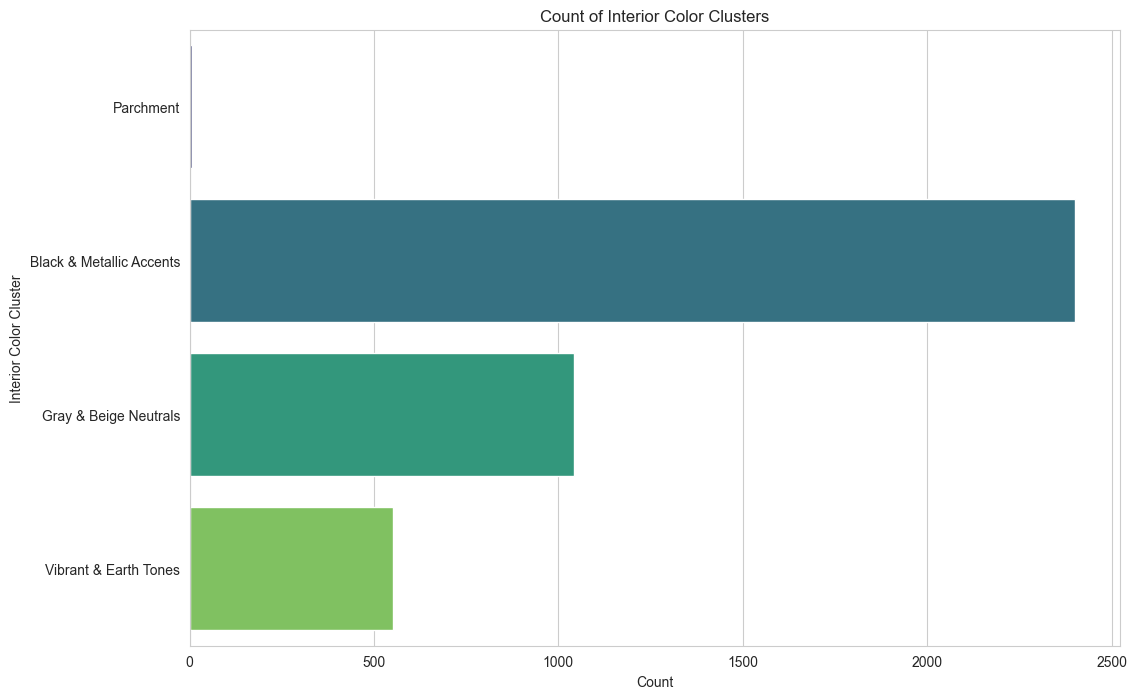

In [237]:

int_cluster_names = {
    0: "Parchment",
    1: "Black & Metallic Accents",
    2: "Gray & Beige Neutrals",
    3: "Vibrant & Earth Tones",
}
# Assign the cluster names to a new column
df['int_col_cluster_named'] = df['int_col_cluster'].map(int_cluster_names)

# Verify the new column
print(df[['int_col', 'int_col_cluster', 'int_col_cluster_named']].head(20))

# Visualize the distribution of the new clusters
plt.figure(figsize=(12,8))
sns.countplot(y='int_col_cluster_named', data=df, order=int_cluster_names.values(), palette='viridis')
plt.title('Count of Interior Color Clusters')
plt.xlabel('Count')
plt.ylabel('Interior Color Cluster')
plt.show()


In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Assuming 'df' is your DataFrame loaded earlier

# Standardize brand names (e.g., remove extra spaces, convert to title case)
df['brand'] = df['brand'].str.strip().str.title()


# Verify unique brands after cleaning
print("Unique Brands After Cleaning:", df['brand'].unique())

import spacy

nlp = spacy.load('en_core_web_md')  # Ensure this model is installed

unique_brands = df['brand'].unique()

brand_vectors = []
valid_brands = []

for brand in unique_brands:
    doc = nlp(brand.lower())
    token_vectors = [token.vector for token in doc if token.has_vector]
    if len(token_vectors) > 0:
        vector = np.mean(token_vectors, axis=0)  # Average embedding for the color name
        brand_vectors.append(vector)
        valid_brands.append(brand)

# Convert to numpy array
brand_vectors = np.array(brand_vectors)



Unique Brands After Cleaning: ['Ford' 'Hyundai' 'Lexus' 'Infiniti' 'Audi' 'Acura' 'Bmw' 'Tesla' 'Land'
 'Aston' 'Toyota' 'Lincoln' 'Jaguar' 'Mercedes-Benz' 'Dodge' 'Nissan'
 'Genesis' 'Chevrolet' 'Kia' 'Jeep' 'Bentley' 'Honda' 'Lucid' 'Mini'
 'Porsche' 'Hummer' 'Chrysler' 'Volvo' 'Cadillac' 'Lamborghini' 'Maserati'
 'Volkswagen' 'Subaru' 'Rivian' 'Gmc' 'Ram' 'Alfa' 'Ferrari' 'Scion'
 'Mitsubishi' 'Mazda' 'Saturn' 'Polestar' 'Rolls-Royce' 'Mclaren' 'Buick'
 'Lotus' 'Pontiac' 'Fiat' 'Karma' 'Saab' 'Mercury' 'Plymouth' 'Smart'
 'Maybach' 'Suzuki']


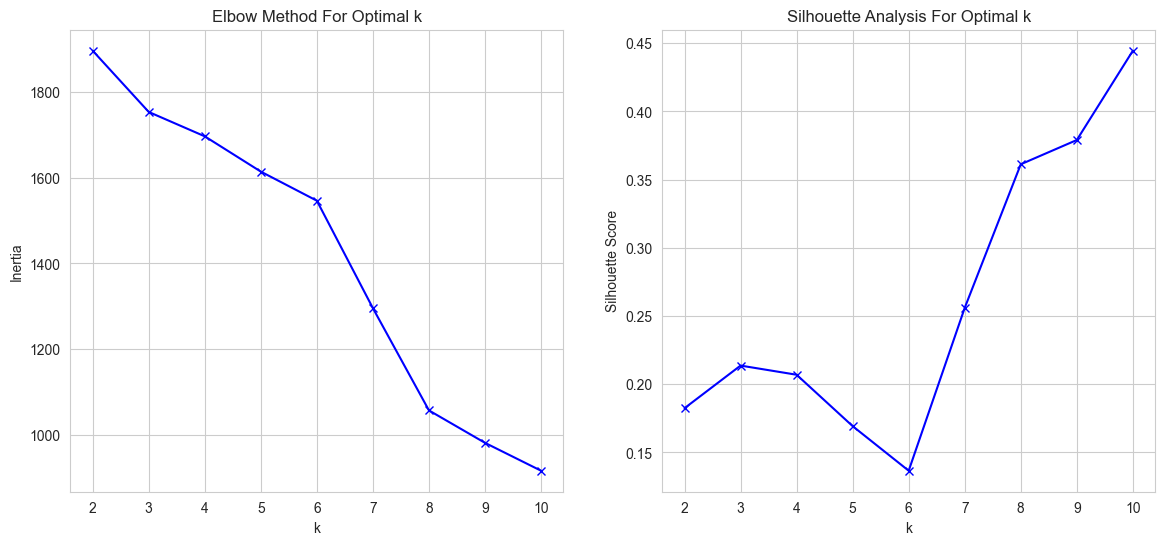

In [239]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the feature matrix for clustering
# Option A: Using NLP embeddings
brand_embeddings_df = pd.DataFrame(brand_vectors, index=valid_brands)
brand_embeddings_df = brand_embeddings_df.reset_index().rename(columns={'index': 'brand'})
X_embeddings = brand_embeddings_df.drop('brand', axis=1).values



# Function to perform Elbow and Silhouette Analysis
def determine_optimal_k(X, max_k=15):
    inertia = []
    silhouette = []
    K = range(2, max_k+1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, labels)
        silhouette.append(silhouette_avg)
    
    # Plot Elbow Method
    plt.figure(figsize=(14,6))
    
    plt.subplot(1,2,1)
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    
    # Plot Silhouette Scores
    plt.subplot(1,2,2)
    plt.plot(K, silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis For Optimal k')
    
    plt.show()
    
determine_optimal_k(X_embeddings, max_k=10)




In [240]:
# Perform clustering with the chosk = 4 # You can experiment with values like 5, 10, 15, etc.
k = 13
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_embeddings)

from collections import defaultdict

cluster_dict = defaultdict(list)
for col_name, lbl in zip(valid_brands, labels):
    cluster_dict[lbl].append(col_name)

for cluster_id, col_list in cluster_dict.items():
    print(f"Cluster {cluster_id}:")
    print(col_list)
    print("\n")


Cluster 0:
['Ford', 'Aston', 'Genesis', 'Bentley', 'Mclaren']


Cluster 9:
['Hyundai', 'Suzuki']


Cluster 6:
['Lexus', 'Toyota', 'Lincoln', 'Nissan', 'Chevrolet', 'Jeep', 'Chrysler', 'Volkswagen', 'Subaru', 'Plymouth']


Cluster 2:
['Infiniti', 'Hummer']


Cluster 4:
['Audi', 'Bmw', 'Honda']


Cluster 5:
['Acura', 'Gmc', 'Scion', 'Mazda', 'Buick', 'Saab']


Cluster 10:
['Tesla', 'Land', 'Mercedes-Benz', 'Dodge', 'Kia', 'Mini', 'Porsche', 'Lamborghini', 'Maserati', 'Ram', 'Ferrari', 'Polestar', 'Rolls-Royce', 'Lotus', 'Fiat', 'Karma', 'Maybach']


Cluster 8:
['Jaguar', 'Mitsubishi']


Cluster 1:
['Lucid', 'Smart']


Cluster 3:
['Volvo', 'Cadillac', 'Pontiac']


Cluster 7:
['Alfa']


Cluster 12:
['Saturn']


Cluster 11:
['Mercury']




In [259]:
# Drop original 'ext_col' and 'int_col' as they are now represented by clusters
df = df.drop(columns=['ext_col', 'int_col'])

df = pd.get_dummies(df, columns=['ext_col_cluster_named', 'int_col_cluster_named'], drop_first=True)

KeyError: "['ext_col', 'int_col'] not found in axis"

In [260]:
df = pd.get_dummies(df, columns=['ext_col_cluster_named', 'int_col_cluster_named'], drop_first=True)


In [261]:
df = pd.get_dummies(df, columns=['fuel_type'], drop_first=True)


In [241]:
df['accident_binary'] = df['accident'].apply(lambda x: 0 if x == 'None reported' else 1)
print(df['accident_binary'].value_counts())


accident_binary
0    2903
1    1099
Name: count, dtype: int64


In [242]:
from sklearn.impute import SimpleImputer

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Numeric imputation (using median)
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Categorical imputation (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
brand                    0
model                    0
model_year               0
milage                   0
fuel_type                0
engine                   0
transmission             0
ext_col                  0
int_col                  0
accident                 0
price                    0
car_age                  0
age_group                0
ext_col_cluster          0
ext_col_cluster_named    0
int_col_cluster          0
int_col_cluster_named    0
accident_binary          0
dtype: int64


In [257]:
transmission_replacements = {
    'Automatic': 'A/T',
    '8-Speed Automatic': '8-Speed A/T'
}

# Apply the replacements
df['transmission'] = df['transmission'].replace(transmission_replacements)

# Step 5: Feature Engineering & Transformation
- Extract features from text fields (e.g., horsepower, engine_size, cylinders from 'engine').
- Transform skewed variables (e.g., log-transform price, mileage).
- Group rare categories, and optionally apply dimensionality reduction (PCA).

**Validation Criteria:**
- Skewness reduced for heavily skewed features.
- Rare categories combined for more stable modeling.


In [243]:
# Example: Extract engine features if present
if 'engine' in df.columns:
    df['horsepower'] = df['engine'].str.extract(r'(\d{2,4}\.?\d*)HP', expand=False).astype(float)
    df['engine_size'] = df['engine'].str.extract(r'(\d\.\d+)L', expand=False).astype(float)
    df['cylinders'] = df['engine'].str.extract(r'(\d+)\s*Cylinder', expand=False).astype(float)
    
    
    df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
    df['engine_size'] = pd.to_numeric(df['engine_size'], errors='coerce')
    df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')
    
    # Define the grouping columns
group_cols = ['brand', 'model']

# Function to impute missing values with group median
def impute_group_median(df, feature, group_cols):
    return df.groupby(group_cols)[feature].transform(lambda x: x.fillna(x.median()))

# Impute horsepower
df['horsepower'] = impute_group_median(df, 'horsepower', group_cols)

# Impute engine_size
df['engine_size'] = impute_group_median(df, 'engine_size', group_cols)

# Impute cylinders
df['cylinders'] = impute_group_median(df, 'cylinders', group_cols)

# For any remaining missing values, impute with overall median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df['engine_size'] = df['engine_size'].fillna(df['engine_size'].median())
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())

print("Missing values after imputation:")
print(df[['horsepower', 'engine_size', 'cylinders']].isnull().sum())


/Users/rayva/Desktop/stat432_final/stat432_venv_311/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/rayva/Desktop/stat432_final/stat432_venv_311/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/rayva/Desktop/stat432_final/stat432_venv_311/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/rayva/Desktop/stat432_final/stat432_venv_311/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/rayva/Desktop/stat432_final/stat432_venv_311/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty sli

Missing values after imputation:
horsepower     0
engine_size    0
cylinders      0
dtype: int64


/Users/rayva/Desktop/stat432_final/stat432_venv_311/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/rayva/Desktop/stat432_final/stat432_venv_311/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/rayva/Desktop/stat432_final/stat432_venv_311/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/rayva/Desktop/stat432_final/stat432_venv_311/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/rayva/Desktop/stat432_final/stat432_venv_311/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty sli

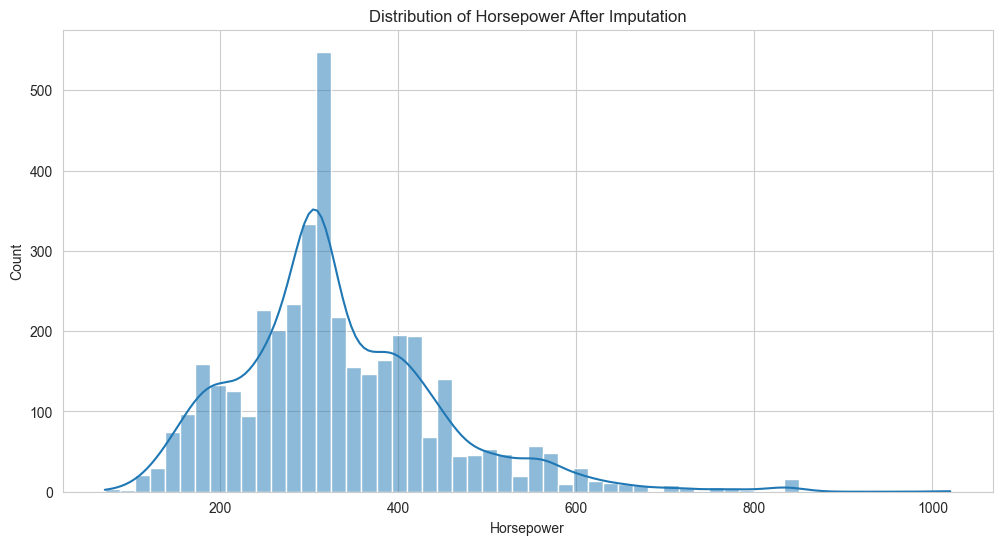

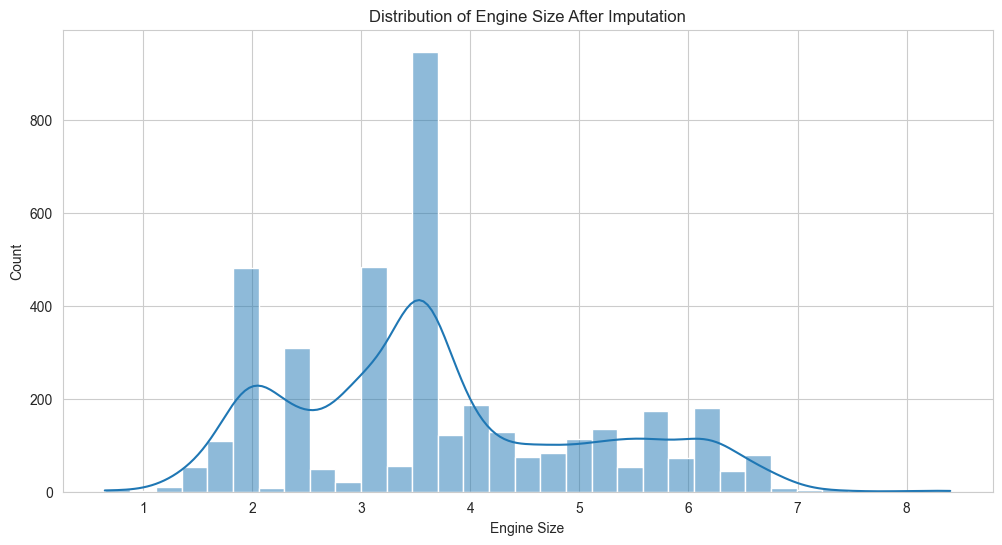

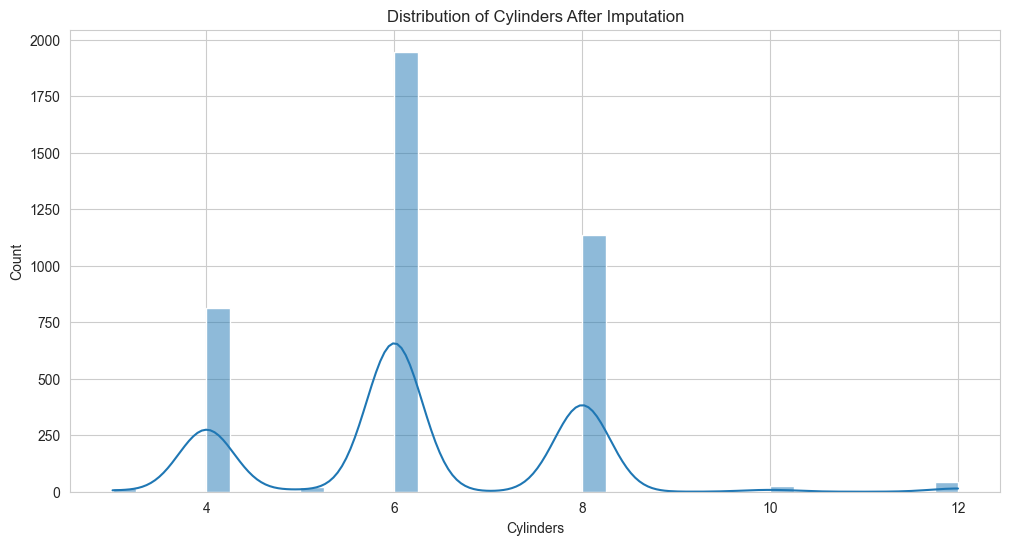

In [244]:
# Example: Compare distributions before and after imputation for horsepower
plt.figure(figsize=(12,6))
sns.histplot(df['horsepower'], kde=True)
plt.title('Distribution of Horsepower After Imputation')
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['engine_size'], kde=True)
plt.title('Distribution of Engine Size After Imputation')
plt.xlabel('Engine Size')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['cylinders'], kde=True)
plt.title('Distribution of Cylinders After Imputation')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.show()



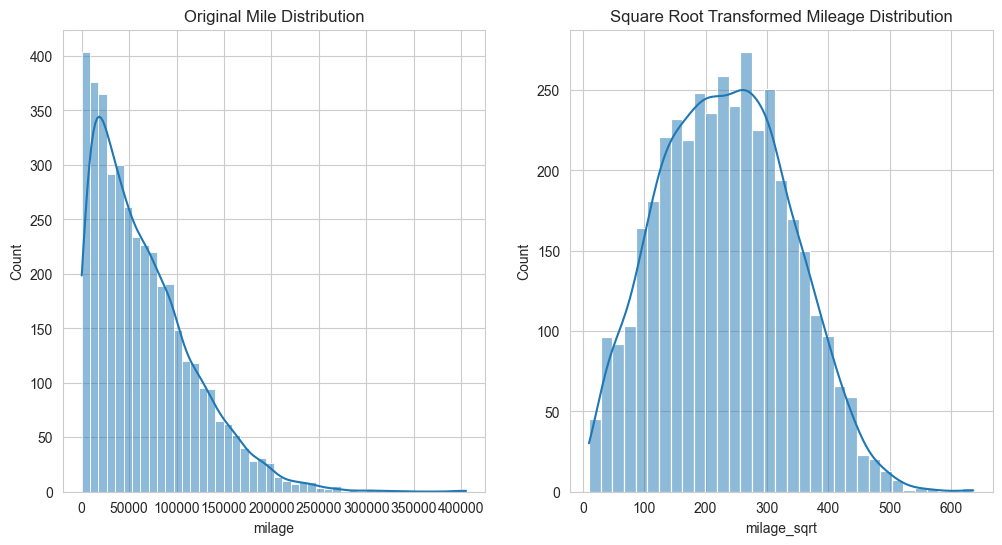

Skewness before transform: 1.160073347244535
Skewness after transform: 0.1528950888355463


In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Log-transform price and mileage
df['milage_sqrt'] = np.sqrt(df['milage'])

# Check distributions before and after
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.histplot(df['milage'], ax=axes[0], kde=True)
axes[0].set_title('Original Mile Distribution')
sns.histplot(df['milage_sqrt'], ax=axes[1], kde=True)
axes[1].set_title('Square Root Transformed Mileage Distribution')
plt.show()

print("Skewness before transform:", df['milage'].skew())
print("Skewness after transform:", df['milage_sqrt'].skew())

if 'milage' in df.columns:
    df = df.drop(columns=['milage'])

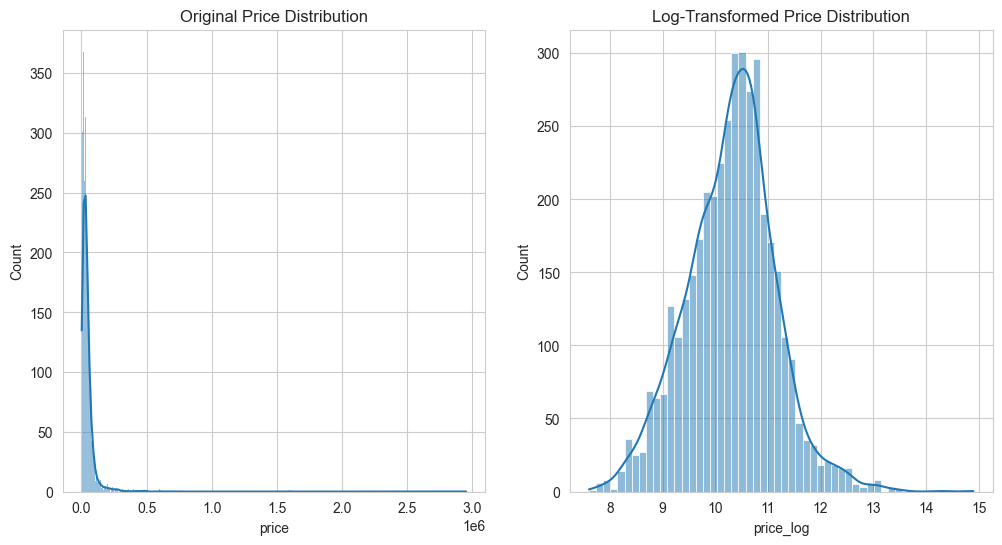

Skewness before transform: 20.279729394398988
Skewness after transform: 0.08215848781026255


In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Log-transform price and mileage
df['price_log'] = np.log1p(df['price'])

# Check distributions before and after
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.histplot(df['price'], ax=axes[0], kde=True)
axes[0].set_title('Original Price Distribution')
sns.histplot(df['price_log'], ax=axes[1], kde=True)
axes[1].set_title('Log-Transformed Price Distribution')
plt.show()

print("Skewness before transform:", df['price'].skew())
print("Skewness after transform:", df['price_log'].skew())

if 'price' in df.columns:
    df = df.drop(columns=['price'])

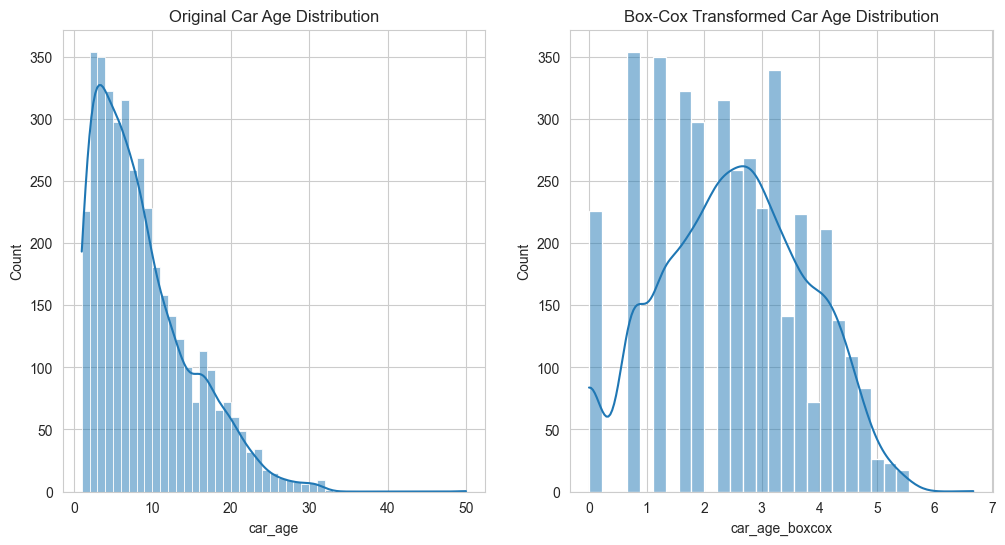

Skewness before transform: 1.0914793068217132
Skewness after transform: -0.04738880609145076


In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Example: Log-transform price and mileage
df['car_age_boxcox'], lambda_ = stats.boxcox(df['car_age'])

if 'model_year' in df.columns:
    df = df.drop(columns=['model_year'])

# Check distributions before and after
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.histplot(df['car_age'], ax=axes[0], kde=True)
axes[0].set_title('Original Car Age Distribution')
sns.histplot(df['car_age_boxcox'], ax=axes[1], kde=True)
axes[1].set_title('Box-Cox Transformed Car Age Distribution')
plt.show()

print("Skewness before transform:", df['car_age'].skew())
print("Skewness after transform:", df['car_age_boxcox'].skew())

In [263]:
if 'clean_title' in df.columns:
    df = df.drop(columns=['clean_title'])
    
if 'accident' in df.columns:
    df = df.drop(columns=['accident'])
    
if 'engine' in df.columns:
    df = df.drop(columns=['engine'])

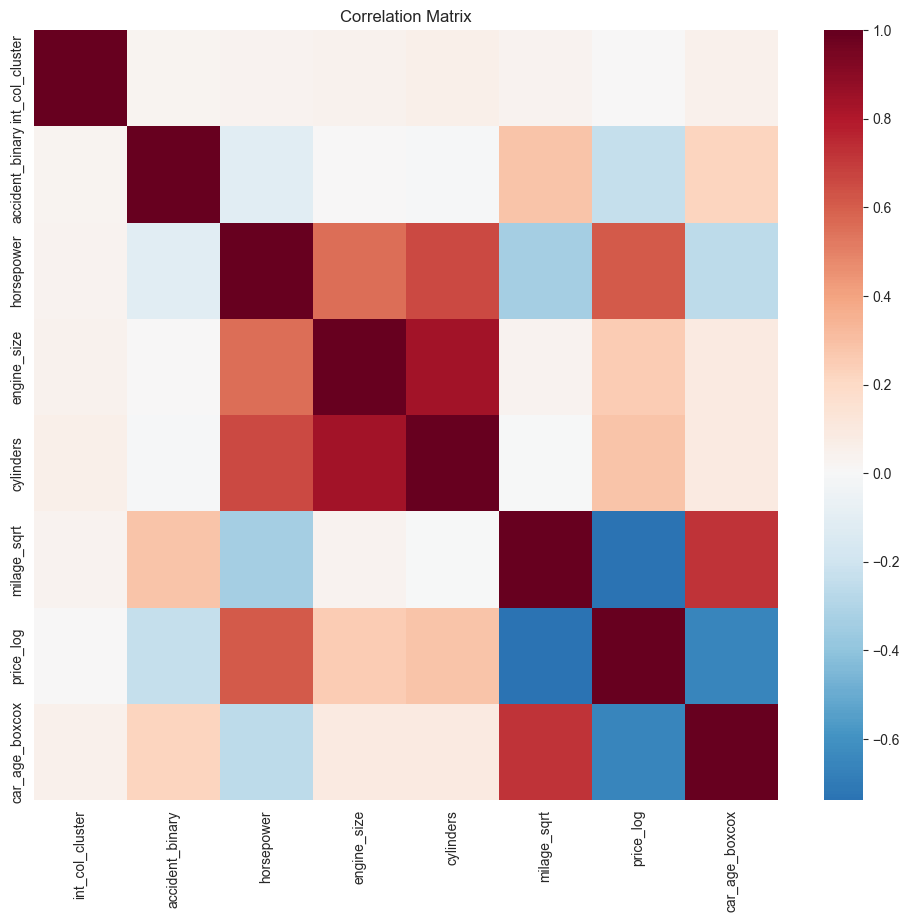


Correlation of Features with Price:
price_log          1.000000
horsepower         0.612027
cylinders          0.282425
engine_size        0.256442
int_col_cluster    0.005974
accident_binary   -0.241946
car_age_boxcox    -0.650821
milage_sqrt       -0.738269
Name: price_log, dtype: float64

Variance Inflation Factors:
           feature        VIF
0  int_col_cluster   3.610239
1  accident_binary   1.500315
2       horsepower   1.990143
3      engine_size   3.481550
4        cylinders   4.326638
5      milage_sqrt  11.182065
6   car_age_boxcox  10.026437


In [264]:
# Correlation matrix
num_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0)
plt.title('Correlation Matrix')
plt.show()

# Price correlation if applicable
if 'price_log' in df.columns:
    price_corr = corr_matrix['price_log'].sort_values(ascending=False)
    print("\nCorrelation of Features with Price:")
    print(price_corr)

# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[num_cols].drop(['price','price_log'], axis=1, errors='ignore')  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)

# Based on VIF and correlation, drop or combine features as needed
# (User decision on which to drop)


In [250]:
print("Missing values per column in X:")
print(X.isnull().sum())
print("Checking for infinite values in X:")
print(np.isinf(X).sum())


Missing values per column in X:
int_col_cluster    0
accident_binary    0
horsepower         0
engine_size        0
cylinders          0
milage_sqrt        0
car_age_boxcox     0
dtype: int64
Checking for infinite values in X:
int_col_cluster    0
accident_binary    0
horsepower         0
engine_size        0
cylinders          0
milage_sqrt        0
car_age_boxcox     0
dtype: int64


# Step 6: Bivariate & Multivariate Analysis
- Explore relationships between variables (correlation matrix, scatter plots).
- Compute VIF to detect multicollinearity.
- Drop or combine correlated features.

**Validation Criteria:**
- No severe multicollinearity (VIF > 10 addressed).
- Understand key correlations (especially with price).


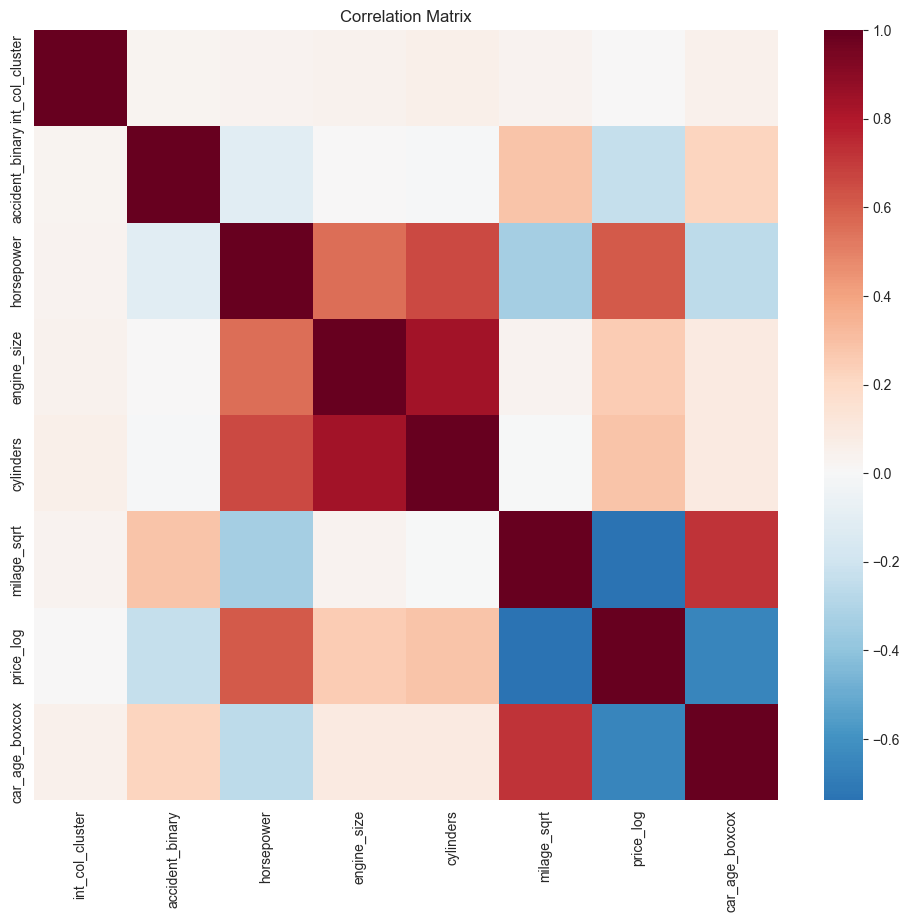


Variance Inflation Factors:
           feature        VIF
0  int_col_cluster   4.939073
1  accident_binary   1.500493
2       horsepower  19.188856
3      engine_size  26.887042
4        cylinders  62.901091
5      milage_sqrt  11.620491
6   car_age_boxcox  10.422485


In [251]:
# Correlation matrix
num_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0)
plt.title('Correlation Matrix')
plt.show()

# Price correlation if applicable
if 'price' in df.columns:
    price_corr = corr_matrix['price'].sort_values(ascending=False)
    print("\nCorrelation of Features with Price:")
    print(price_corr)

# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[num_cols].drop(['price','price_log'], axis=1, errors='ignore')  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)

# Based on VIF and correlation, drop or combine features as needed
# (User decision on which to drop)


# Step 7: Scaling & Finalizing Feature Set
- Scale numeric features.
- Finalize the feature matrix (X) for modeling.
- At this point, the dataset should be clean, with no missing values, and ready for cluster/regression modeling.

**Validation Criteria:**
- All numeric features scaled.
- Final features chosen for model building.


In [252]:
from sklearn.preprocessing import StandardScaler

# Example: scale selected numeric features
final_num_features = ['car_age', 'milage_log', 'horsepower', 'engine_size', 'cylinders']  # adjust as appropriate
final_num_features = [f for f in final_num_features if f in df.columns]

scaler = StandardScaler()
df[final_num_features] = scaler.fit_transform(df[final_num_features])

# Finalize the feature matrix X (example)
target = 'price_log'  # example target
X = df.drop(columns=[target], errors='ignore')  # Remove target
y = df[target] if target in df.columns else None

print("Final Feature Matrix Shape:", X.shape)
print("Feature Matrix Columns:", X.columns)


Final Feature Matrix Shape: (4002, 19)
Feature Matrix Columns: Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'age_group', 'ext_col_cluster',
       'ext_col_cluster_named', 'int_col_cluster', 'int_col_cluster_named',
       'accident_binary', 'horsepower', 'engine_size', 'cylinders',
       'milage_sqrt', 'car_age_boxcox'],
      dtype='object')


In [253]:
X.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,age_group,ext_col_cluster,ext_col_cluster_named,int_col_cluster,int_col_cluster_named,accident_binary,horsepower,engine_size,cylinders,milage_sqrt,car_age_boxcox
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,10-12 years,3,Black Shades,1.0,Black & Metallic Accents,1.0,-0.274439,0.004141,-0.14857,225.831796,3.295535
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,0-3 years,0,Blue Shades,2.0,Gray & Beige Neutrals,1.0,-0.352107,0.077306,-0.14857,186.392060,1.266121
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,0-3 years,0,Blue Shades,1.0,Black & Metallic Accents,0.0,-0.179513,-0.142189,-0.14857,149.572725,0.757507
3,Infiniti,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,7-9 years,3,Black Shades,1.0,Black & Metallic Accents,0.0,0.191564,-0.142189,-0.14857,298.161030,2.937034
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,0-3 years,2,White & Light Metallics,1.0,Black & Metallic Accents,0.0,-0.179513,-1.239666,-0.14857,99.171569,1.266121
